<a href="https://colab.research.google.com/github/dishapalan02/AI-Enabled-IT-Service-Ticketing-tool/blob/main/AI-Enabled-Ticket-Automation-master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***AI Enabled IT Ticketing Service Tool*** 

# 1. PROBLEM STATEMENT 

In any of the IT industry, incident management plays an important role in delivering quality and timely support to its customers across the globe.

The incidents are generally created by various stakeholders like end users, vendors, IT users, etc. They might not have right information as to which team the ticket should go to. Hence, to imporve and retain customer satisfaction, it is very important that the ticket is assigned to the right group of people for faster and approproiate resolution. In many Organizations this is still a manual process. There are few problems with the manual process:
1. Manual assignment of incidents is time consuming
2. It requires human efforts
3. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing
4. Manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service

L1 / L2 needs to spend time to review Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum 25–30% of incidents needs to be reviewed for SOPs before ticket assignment).  

15 mins are being spent for SOP review for each incident. Minimum of 1 FTE effort needed only for incident assignment to L3 teams.  

During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups.  

Around 25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups 

During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service and loss of business.




# 2. OBJECTIVE

We are building an AI solution which will enable organizations to classify incidents to the right functional group by implementing the best suited machine learning model and leading to customer satisfaction. 

Guided by AI, organizations can reduce the resolution time and focus on more productive tasks. This will overcome and save time with below losses:

1. Time latency due to review of SOPs before assigning to right functional group 
2. Incorrect assignments to functional groups
3. #ToDo ( Include figures for losses and revenue ) --> to be checked by Gloria 

# 3. SOLUTION

Below approach is taken to determine the assignment groups based on the ticket description and short description.

1. Exploratory data analysis  
2. Visualized different patterns in the dataset and performed further analysis
3. Performed target column i.e. assignment group analysis
4. Dealt with inconsistencies like treating the missing values and merging the short description and long description to determine the assignment group for ticket
5. Text preprocessing done by fixing the encoding, detecting different languages and translating to English
6. Performed data cleaning by removing stop words, lemmatization and creating tokens
7. Performing Named Entity recognition and find POS tags for description
8. Modelling : Modelling was performed in two rounds:
- Round I - Before treating class imbalance : Below Models are employed : 
    - Multinomial Naive Bayes
    - SVM
    - KNN 
    - SGD
    - Random Forest
    - XgBoost
    - CNN
    - LSTM
- Round II - After treating class imbalance : Below Models are employed : 
    - Multinomial Naive Bayes
    - SVM
    - KNN 
    - SGD
    - Random Forest
    - XgBoost
    - CNN
    - LSTM
    - Bagging 
    - Boosting
    - Stacking
    - Decision Tree
    - GRU

9. Hyperparameter Tuning was done for above models
10. Transfer learing is employed with DISTILBERT with LinearSVC and Logistic regression with resampled data

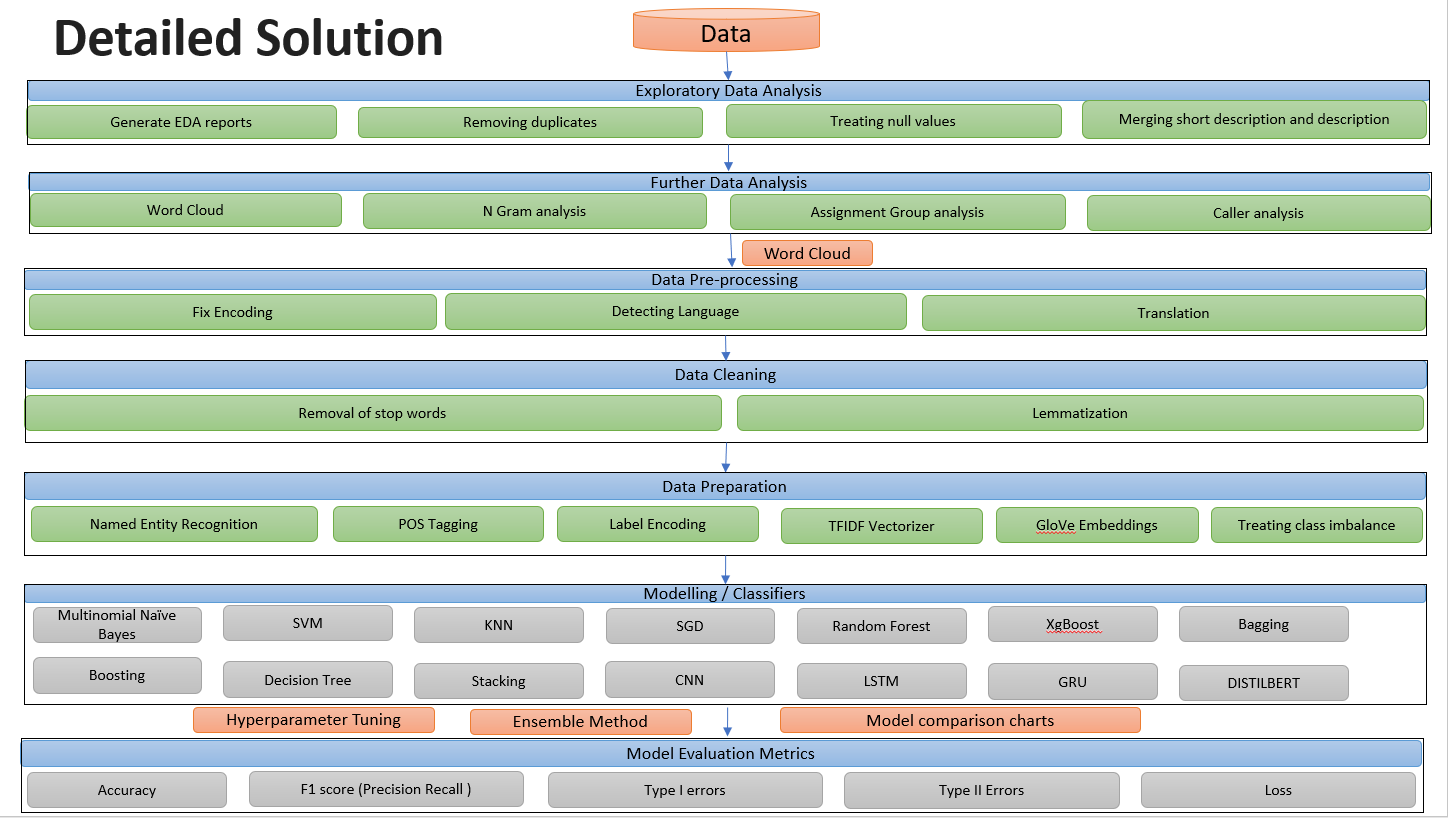

# DATASET

https://drive.google.com/open?id=1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ

# 3.1 INSTALL THE REQUIRED LIBRARIES

In [2]:
# Sweetviz is an open-source Python library that generates beautiful, high-density visualizations 
# to kickstart EDA (Exploratory Data Analysis) with just two lines of code. 
# Output is a fully self-contained HTML application.

!pip install sweetviz

     |████████████████████████████████| 15.1MB 177kB/s 
     |████████████████████████████████| 81kB 11.0MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [3]:
# Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code.
# It generates a report with all the information easily available
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 29.0MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 3.1MB 51.7MB/s 
     |████████████████████████████████| 1.1MB 54.5MB/s 
     |████████████████████████████████| 296kB 46.6MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=9ef97e29e9051087ee8b8ff4b776937dcdbc6801887988af1755cce0643f4a53
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=c4ab548cb50d824d67d1258ba5cc2b4e3da360640bf9daf906036863f7c8c630
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built htmlmin phik
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing installation: pandas-profiling 1.4.1
    Uninstalling p

In [4]:
#Visualization library to generate graphs
!pip install plotly==4.4.1

In [5]:
#We need cufflinks to link plotly to pandas dataframe and add the iplot method
!pip install plotly cufflinks

In [6]:
#Fixes Text For You :- Library to detect and fix Mojibakes.It fixes Unicode that’s broken. The goal of ftfy is to take in bad Unicode and output good Unicode.
!pip install ftfy

     |████████████████████████████████| 71kB 9.1MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-cp37-none-any.whl size=41935 sha256=9c8ad878802209d05d0b2ef5c69b0b90b04575af5b83149426ed6e86ea989f39
  Stored in directory: /root/.cache/pip/wheels/99/2c/e6/109c8a28fef7a443f67ba58df21fe1d0067ac3322e75e6b0b7
Successfully built ftfy


In [7]:
#Detects language of a given text
!pip install langdetect

     |████████████████████████████████| 983kB 31.4MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993242 sha256=c026a7d6c16d84b71605e4bac2cfb6e18fc631fef533ff43e574602bc6603f74
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect


In [8]:
!pip install translate-api

     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 6.3MB 34.1MB/s 
  Created wheel for PyExecJS: filename=PyExecJS-1.5.1-cp37-none-any.whl size=14597 sha256=8051cf08bb8b49de86b3f09fccd597e9e2df260822be5e45276f066a2e3b38d0
  Stored in directory: /root/.cache/pip/wheels/43/25/28/52dd7a6c691b1551e3d4482f3f16ef630cc9f59cae99cd33ba
Successfully built PyExecJS
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [9]:
pip install imbalanced-learn

# 3.2 IMPORTING NECESSARY LIBRARIES

In [10]:
# Basic libraries
import pandas as pd                         # Needed for data structures
import numpy as np                          # Needed for numerical calculation
import pickle
from scipy.stats import randint

# Data Visualization
import matplotlib.pyplot as plt             # Needed for graphs and charts during data analysis
import seaborn as sns                       # Needed for graphs and charts during data analysis
from wordcloud import WordCloud, STOPWORDS  # Needed to display word clouds
import plotly.offline as plty
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px

#Utilities
from time import time
import os,sys

# EDA Reporting
import sweetviz as sv                       # Needed for EDA and generating report
from pandas_profiling import ProfileReport  # Needed for EDA and generating report

# Show graphs and plots inline
%matplotlib inline

# Text Processing 
import ftfy
from langdetect import detect
import re
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#NLP toolkits
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
nltk.download('wordnet')
from textblob import Word
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag # function that tags words by their part of speech

#Translations
import requests
import json
import pickle
import translators as ts

#Named Entity Recognition
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy import displacy

#Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score
from sklearn.metrics import classification_report, make_scorer

# Traditional Modeling
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, StratifiedKFold,cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn import tree, model_selection
from mlxtend.classifier import StackingCVClassifier
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier

#Sequential Modeling
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import Input, Dropout, Flatten, Dense, Embedding, LSTM, Bidirectional,GlobalMaxPool1D, GRU
from keras.layers import BatchNormalization, Conv1D, MaxPooling1D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.callbacks import History


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



0.4.3
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Using United States server backend.


# *Pre-Processing, Data Visualizationand EDA*

# 3.3 IMPORT THE DATASET

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Fetch the data from input data stored in Goolge drive
incidents_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/input_data.xlsx')

# *Exploring the given Data files*

In [13]:
# Check the first 5 rows of dataset
incidents_data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [14]:
#Check the last 5 rows of the dataset
incidents_data.tail()

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,\n\nreceived from: avglmrts.vhqmtiua@gmail.com...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49


## *Understanding the structure of data*

# 3.4 EDA

## 3.4.1 Visualizing and analysing data

### 3.4.1.1 Report visualization using SweetViz

                                             |          | [  0%]   00:00 -> (? left)

Report Incidents_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



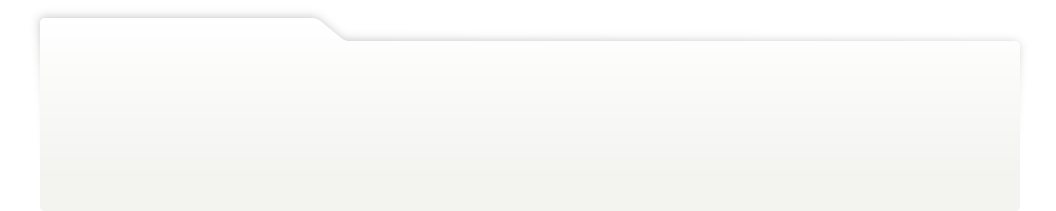
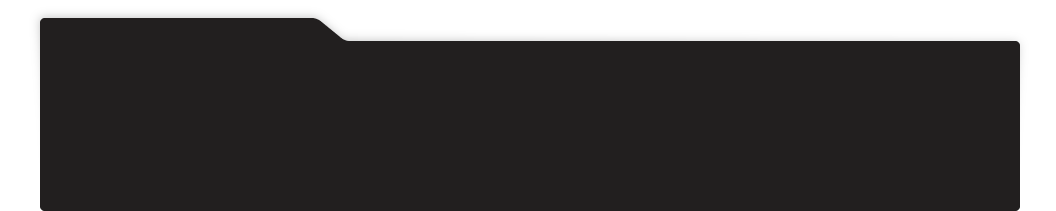
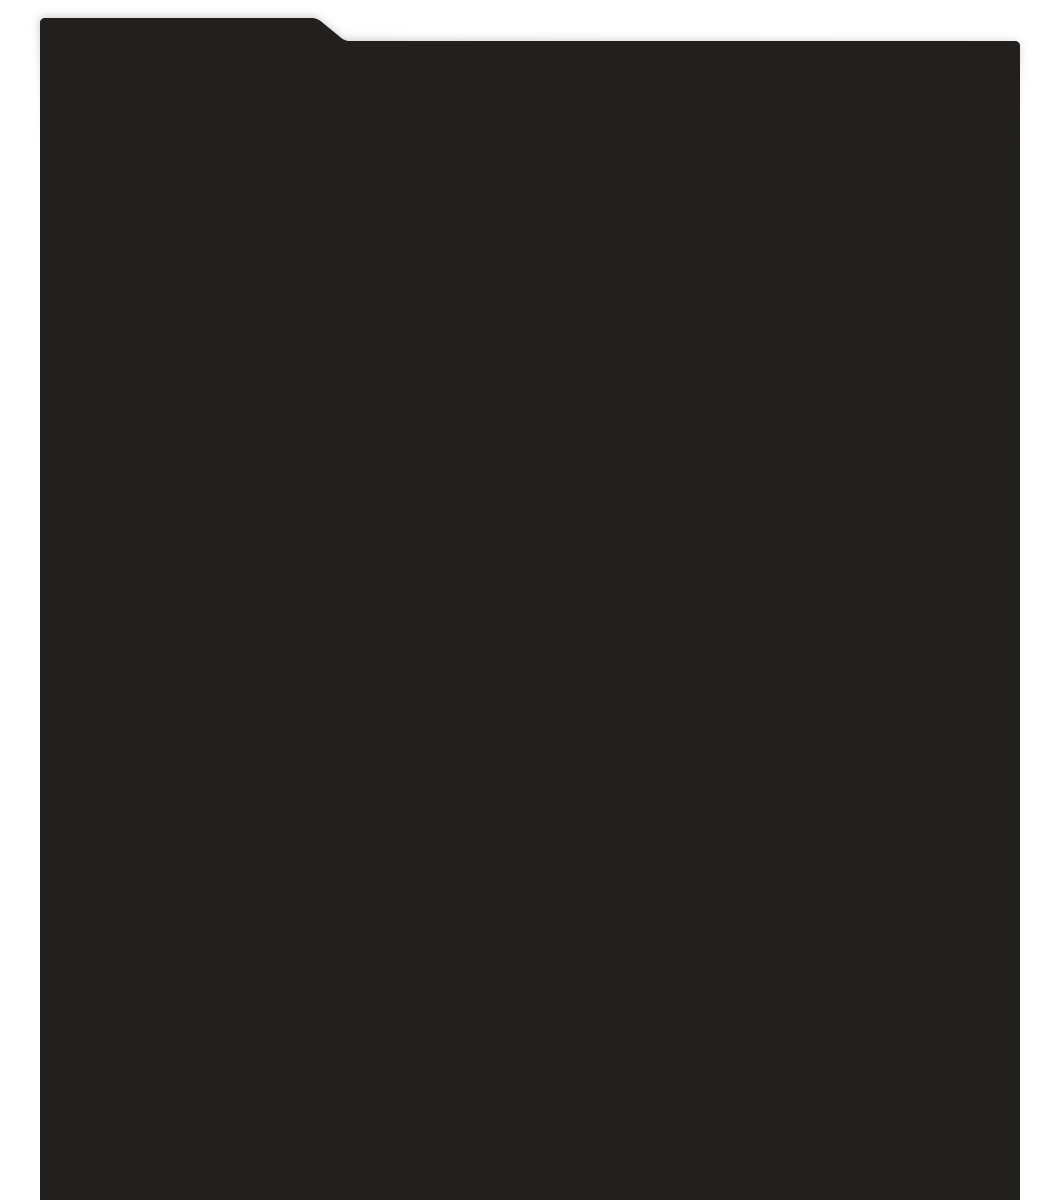
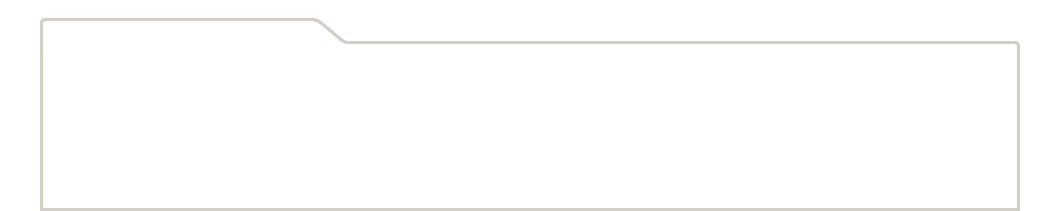
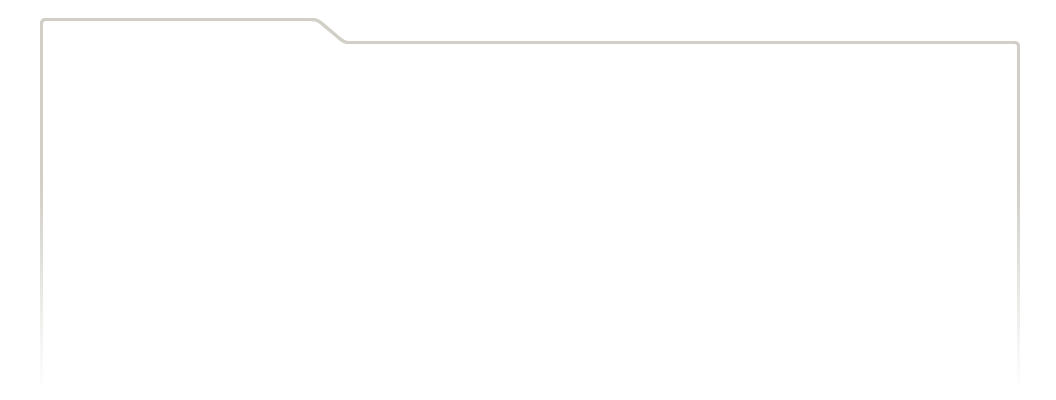
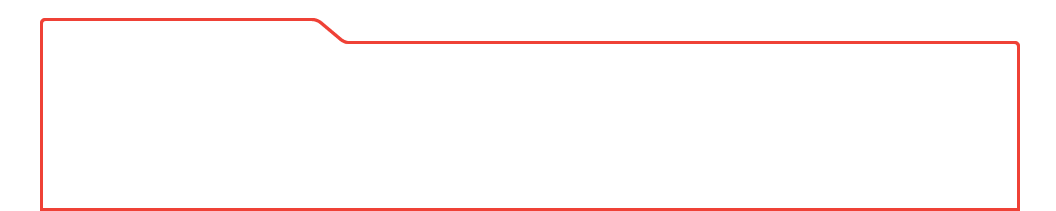
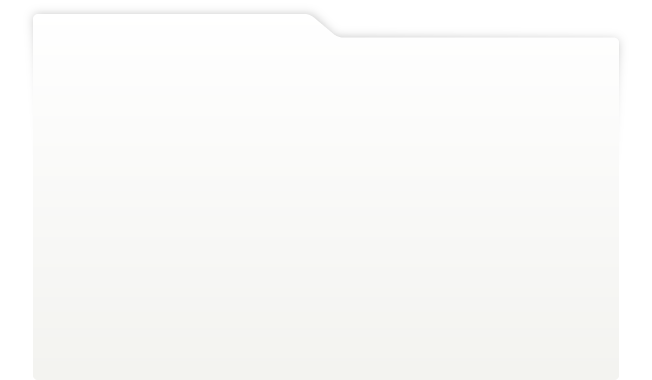
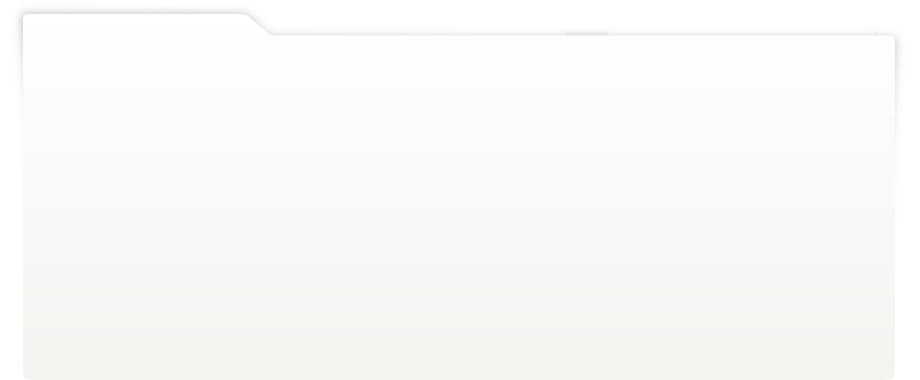
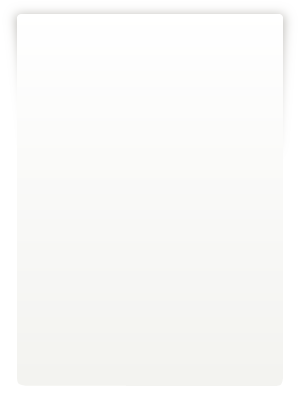
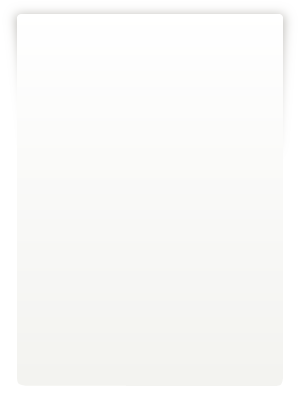
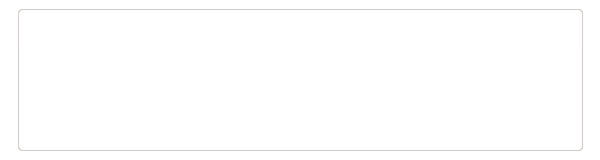
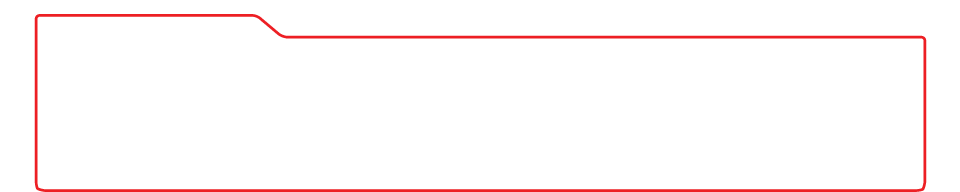
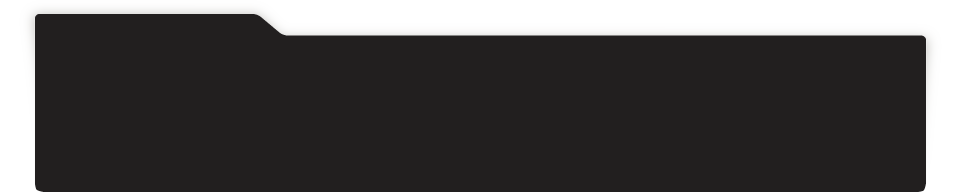
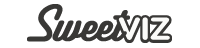
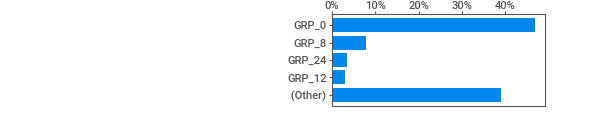
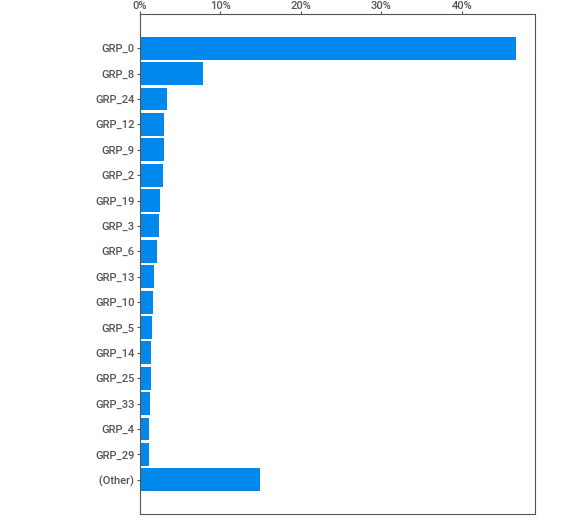
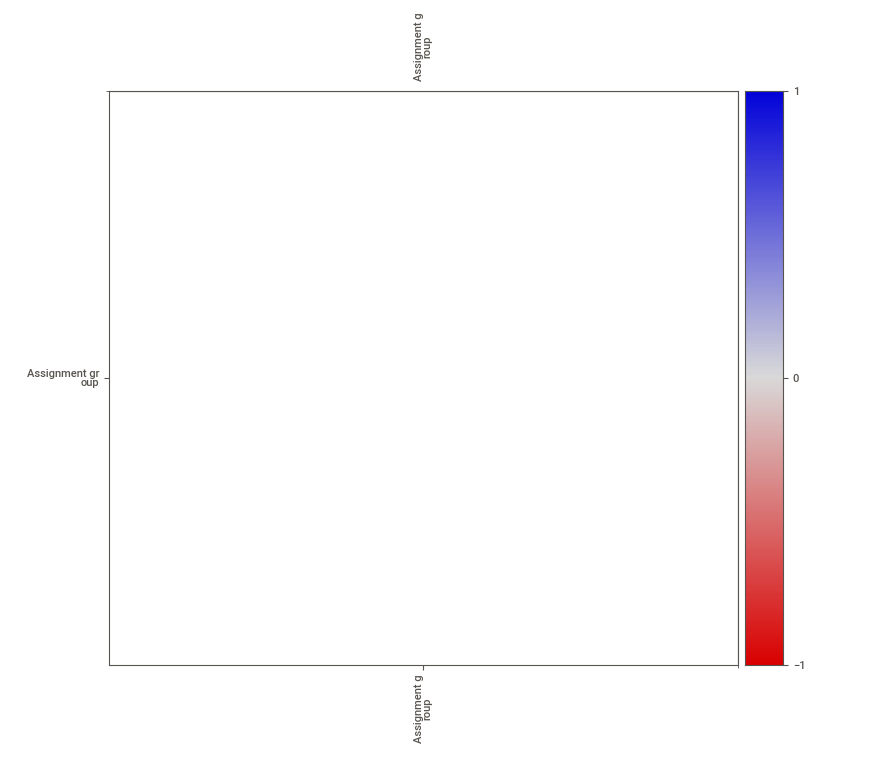
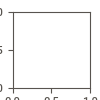

In [15]:
incidents_report = sv.analyze(incidents_data)
#display the report
incidents_report.show_html('Incidents_sweetviz_report.html')
incidents_report.show_notebook()

### 3.4.1.2 Report visualization using Pandas Profiling

In [16]:
incident_report = ProfileReport(incidents_data, html={'style': {'full_width' : True}})
incident_report.to_file(output_file='Incidents_pandas_profiling_report.html')
incident_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 3.4.1.3 Observations from SweetViz and Pandas Profiling reports above

From Above two reports we have below onservations: 
1. Shape of the data - { Rows : 8500, Columns : 4 }
2. Total features - 3
    
    2.1. Short Description - Text

    2.2. Description - Text

    2.3. Caller - Text
3. Target Column - 1
  
    3.1 Assignment Group - Categorical
4. There are 84 duplicate records in total. Strategy to handle duplicates and the approach taken is defined in the preprocessing section below.
5. New features are required or not needs to be analyzed further and also to check if below hidden patterns can be figured out: 
          A. Common Issues -> user can be trained if possible 
          B. Common Caller -> May be user needs training or help with hardware or software
          C. #ToDo To find if issue is controllable or not --> Check if possible .
          D. To find if customer is happy with service or needs further imporvement and assistance

Now let's have a look at individual features: 

1. **Short description** 
  
   A. Total values - 8492 ( > 99% )
   
   B. Missing values - 8 ( < 1% )

   C. Distinct values - 7481 (88%)

   D. Mostly occuring value - password reset ( 0.4% )
   
   E. We can also see the number of times each value is being repeated

   F. Max length of statement - 159

   G. It contains:
    
        Characters -> Lowercase Letter, Punctuation, 
        Uppercase Letter, Decimal Number, 
        Math Symbol, Math_Symbol, 
        Modifier Symbol, Other_Number, 
        Other_Symbol, Currency_Symbol

        Scripts -> Common(ASCII) and Latin

  H. Point G indicates that we have to translate the texts in the dataset based on the scripts as part of data preprocessing.

2. **Description** 
  
   A. Total values - 8499 ( > 99% )
   
   B. Missing values - 1 ( < 1% )

   C. Distinct values - 7817 ( 92% )

   D. Mostly occuring value - it shows "the" ( 0.7% ) but will analyze further after the removal of stop words. But we consider the next which is windows password reset ( 0.3% )

   E. We can also see the number of times each value is being repeated

   F. Max length of statement - 13001

   G. It contains:
    
        Characters -> Lowercase Letter, Punctuation, 
        Uppercase Letter, Decimal Number, 
        Math Symbol, Math_Symbol, 
        Modifier Symbol, Other_Number, 
        Other_Symbol, Currency_Symbol

        Scripts -> Common(ASCII) and Latin

  H. Point G indicates that we have to translate the texts in the dataset based on the scripts as part of data preprocessing.

3. **Caller** 
  
   A. Total values - 8500 ( 100% )
   
   B. Missing values - no missing value
 
   C. Distinct values - 2950 ( 35% )

   D. Mostly occuring value - bpctwhsn kzqsbmtp (10%)

   E. We can also see the number of times each value is being repeated

   F. Max length of statement - 30

   G. It contains:
    
        Characters -> Lowercase Letter, Space_Separator, 
        Uppercase Letter, Connector_Punctuation

        Scripts -> Common(ASCII) and Latin

  H. Point G indicates that we have to translate the texts in the dataset based on the scripts as part of data preprocessing.

4. **Assignment Group** 
  
   A. Total values - 8500 ( 100% )
   
   B. Missing values - no missing value 

   C. Distinct values - 74 

   D. Mostly occuring value - GRP_0 (47% ~ nearly half of the data --> Hence we can say that target class is highly imbalanced, so needs a strategy to be employed to reduce the bias here)

   E. We can also see the number of times each value is being repeated

   G. This indicates we can merge few assignment groups with smaller percentage to reduce overall number of categories. 


### 3.4.1.4 Other Observations

1. There are duplicates which needs to be tackled
2. There are mojibake texts in the description and short description which needs to be processed 
3. There are texts belonging to different languages which needs translations
4. There are email ids, blank spaces, dates, numbers which needs to be processed
5. There are missing values to be treated


## 3.4.2 Further data analysis 

In [17]:
# Print the counts for unique values of short description
incidents_data['Short description'].value_counts()

password reset                                                                         38
windows password reset                                                                 29
account locked in ad                                                                   24
windows account locked                                                                 23
erp SID_34 account unlock                                                              19
                                                                                       ..
probleme mit bildschirmschoner \ we91 \jionmpsf wnkpzcmv                                1
ticketing_tool ticket                                                                   1
restore deleted opportunities                                                           1
crm license for user dfgry                                                              1
security incidents - ( in33426117 ) : correlation rule triggered: icmp ping failure     1
Name: Shor

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

In [18]:
?WordCloud

In [19]:
#Generic method to display WordCloud
def show_word_cloud(column):
    comment_words = ' '
    stopwords = set(STOPWORDS)
    #stopwords.update(["yes", "na"])

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
          
        comment_words += " ".join(tokens)+" "
  
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords,
                    max_words = 100,
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

Let's now check the wordclouds for Short description and Description features.

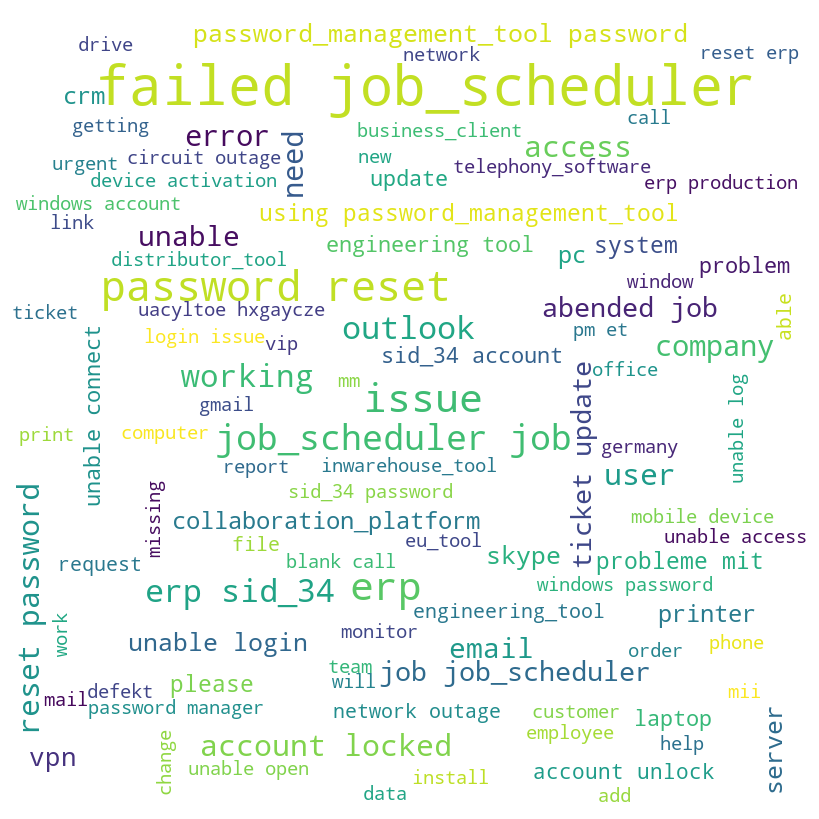

In [20]:
#Word cloud for Short Description

wordcloud_short_desc = show_word_cloud(incidents_data['Short description'])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_short_desc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [21]:
# Print the counts for unique values of Description
incidents_data["Description"].value_counts()

the                                                                                                                                                                                                             56
windows password reset                                                                                                                                                                                          29
password reset                                                                                                                                                                                                  26
windows account locked                                                                                                                                                                                          23
account locked in ad                                                                                                                                        

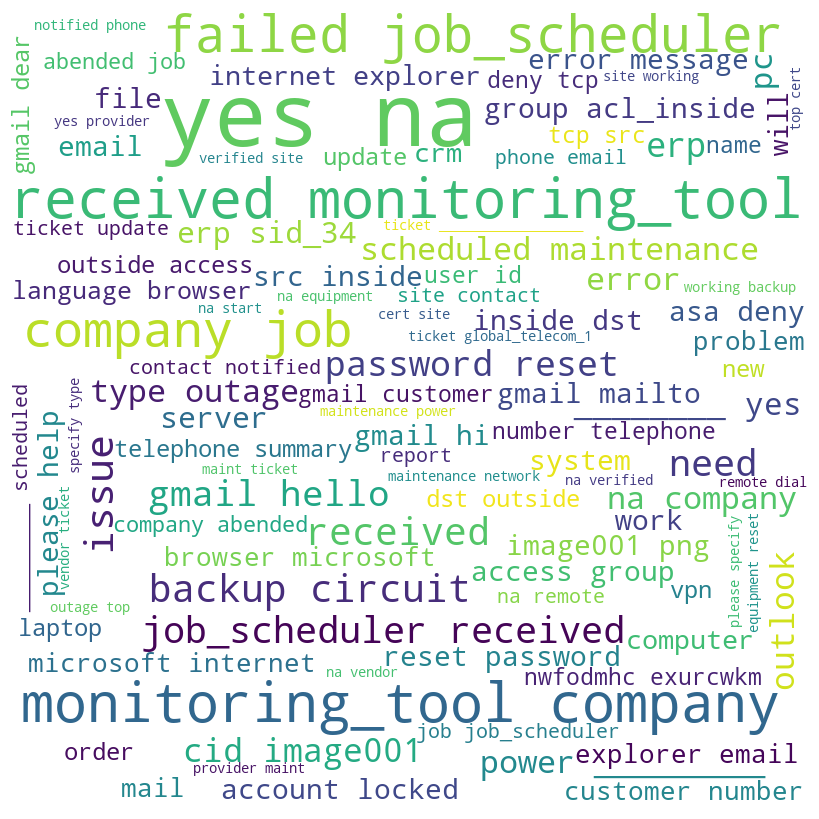

In [22]:
#Word cloud for Description

wordcloud_desc = show_word_cloud(incidents_data['Description'])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_desc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [23]:
# Print the counts for unique values of Caller
incidents_data["Caller"].value_counts()

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
                    ... 
ctxwsvam vwgpjauf      1
qkprzfew poliamdb      1
bmhrsxlf ukatbwyi      1
rovsabyl idpvbjtw      1
jxpmkhay ruvnpyqb      1
Name: Caller, Length: 2950, dtype: int64

In [24]:
# Fetching top 10 Callers
caller_counts = incidents_data["Caller"].value_counts().reset_index()
top_ten_callers = caller_counts[:10].copy()

In [25]:
print ( "Top 10 Callers")
top_ten_callers

Top 10 Callers


,index,Caller
0,bpctwhsn kzqsbmtp,810
1,ZkBogxib QsEJzdZO,151
2,fumkcsji sarmtlhy,134
3,rbozivdq gmlhrtvp,87
4,rkupnshb gsmzfojw,71
5,jloygrwh acvztedi,64
6,spxqmiry zpwgoqju,63
7,oldrctiu bxurpsyi,57
8,olckhmvx pcqobjnd,54
9,dkmcfreg anwmfvlg,51


In [26]:
if len(caller_counts) > 20:
  remaining_caller_df = pd.DataFrame({"index":['Other callers'],
                                      "Caller":sum(caller_counts.Caller[10:]) })

In [27]:
top_ten_callers_data = top_ten_callers.append(remaining_caller_df, ignore_index=True, sort=True)

In [28]:
top_ten_callers_data.iplot(kind='pie',
         labels='index', 
         values='Caller',
         title = 'Assignment group distribution of top 10 callers as compared to other callers')

From the above we can say that 9.53% of requests are from Caller "**bpctwhsn kzqsbmtp**". May be this user needs some training or might be facing more issues compared to other callers.

Now lets also check the disbribution of top 10 callers amongst themselves.

In [29]:
caller_data = pd.DataFrame(incidents_data.groupby(['Caller']).size().nlargest(10), columns=['Count']).reset_index()
caller_data.sort_values(by=['Count'])
caller_data.iplot(kind='pie',
         labels='Caller', 
         values='Count',
         title = 'Assignment Group distribution amongst the top 10 callers')

From this we can see the distribution amongst the top 10 callers which indicates that Caller "**bpctwhsn kzqsbmtp**" has created about 52.5% of issues.

## *Visualizing different patterns* 

## 3.4.3 Target group analysis 

In [30]:
# Print the counts for unique values of Assignment Group
incidents_data['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_64       1
GRP_73       1
GRP_70       1
GRP_35       1
GRP_61       1
Name: Assignment group, Length: 74, dtype: int64

In [31]:
fig = px.histogram(incidents_data,x='Assignment group',barmode='group',color='Assignment group')
fig.update_layout(
    title_text='Assignment group distribution', # title of plot
    width=1000,
    height=1000,
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show()

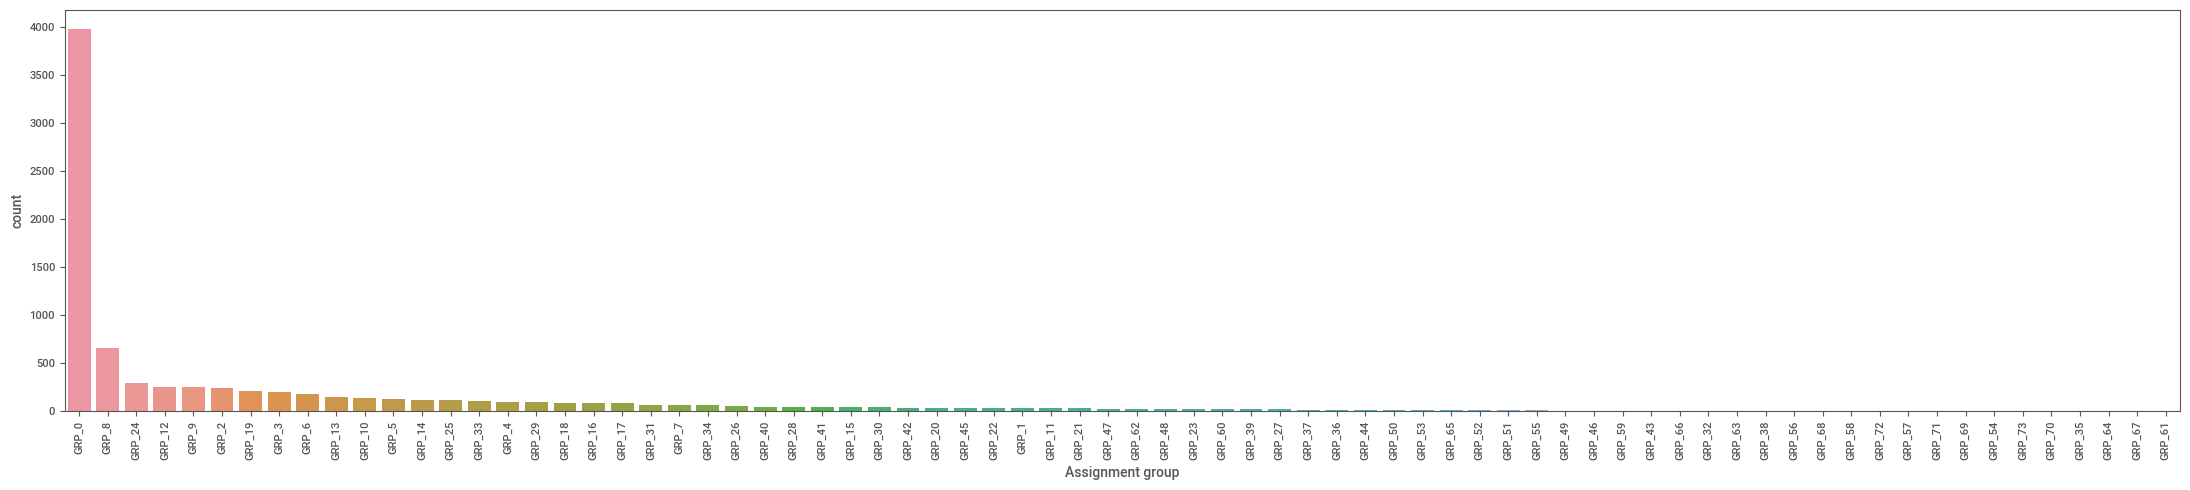

In [32]:
#Visualizing imbalance in the target class to find what all are smallest groups that can be merged to reduce total number of classification classes.
plt.figure(figsize=(22,5))
sortOrder = incidents_data['Assignment group'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(x='Assignment group', data=incidents_data,order=sortOrder)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()


In [33]:
ticket_selected_grp = incidents_data.groupby(['Assignment group']).filter(lambda x: len(x) <=30)
print("No of Assignment groups with less than or equal to 30 tickets", ticket_selected_grp['Assignment group'].nunique())


No of Assignment groups with less than or equal to 30 tickets 40


Now lets see the distribution of tickets for groups other than GRP_0, GRP_8 and Groups having tickets <=30.

---





In [34]:
ticket_excluded_grp = ['GRP_0','GRP_8']
ticket_excluded_grp.extend(ticket_selected_grp['Assignment group'].unique())

ticket_excluded_grps = incidents_data[~incidents_data['Assignment group'].isin(ticket_excluded_grp)]

ticket_assigned_grp = pd.DataFrame(ticket_excluded_grps.groupby('Assignment group').size(),columns=['Count']).reset_index()
ticket_assigned_grp.sort_values(by=['Assignment group'])

,Assignment group,Count
0,GRP_1,31
1,GRP_10,140
2,GRP_12,257
3,GRP_13,145
4,GRP_14,118
5,GRP_15,39
6,GRP_16,85
7,GRP_17,81
8,GRP_18,88
9,GRP_19,215


In [35]:
ticket_assigned_grp.iplot(kind='pie',
         labels='Assignment group', 
         values='Count',
         title = 'Assignment groups Distribution except GRP_0 and GRP_8 and Groups having ticket count <= 30')

In [36]:
incidents_data_counts = incidents_data['Assignment group'].value_counts().reset_index()

In [37]:
incidents_data_counts.head()

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252


We can use above figure to define the ranges to see which groups have tickets in below range. This will help us understand the most important groups to focus on. The ranges can be as below: 
1. 1 ticket
2. 2 tickets
3. 3-8 tickets
4. 9-14 tickets
5. 15-30 tickets
6. 31-50 tickets
7. 51-100 tickets
8. 101-200 tickets
9. 201-300 tickets
10. more than 300 tickets

In [38]:
ticket_bins = pd.DataFrame(columns=['No. of tickets','No. of Assignment groups'])
_1_ticket = {'No. of tickets':'1 ticket','No. of Assignment groups':len(incidents_data_counts[incidents_data_counts['Assignment group'] == 1])}
_2_tickets = {'No. of tickets':'2 tickets',
              'No. of Assignment groups':len(incidents_data_counts[incidents_data_counts['Assignment group'] == 2 ])}
_3_8_tickets = {'No. of tickets':' 3-8 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 2 )& (incidents_data_counts['Assignment group'] < 9 )])}
_9_14_tickets = {'No. of tickets':' 9-14 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 8)& (incidents_data_counts['Assignment group'] < 15 )])}
_15_30_tickets = {'No. of tickets':' 15-30 ticket',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 14)& (incidents_data_counts['Assignment group'] < 31 )])}      
_31_50_tickets = {'No. of tickets':' 31-50 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 30)& (incidents_data_counts['Assignment group'] < 51)])}      
_51_100_tickets = {'No. of tickets':' 51-100 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 50)& (incidents_data_counts['Assignment group'] < 101)])}   
_101_200_tickets = {'No. of tickets':' 101-200 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 100)& (incidents_data_counts['Assignment group'] < 201)])}
_201_300_tickets = {'No. of tickets':' 201-300 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 200)& (incidents_data_counts['Assignment group'] < 301)])}                                                       
_301_tickets = {'No. of tickets':' > 301 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 300)])}
# Append row to the bins
ticket_bins = ticket_bins.append([_1_ticket,_2_tickets,_3_8_tickets,
                          _9_14_tickets,_15_30_tickets,_31_50_tickets,_51_100_tickets,_101_200_tickets,_201_300_tickets,_301_tickets], ignore_index=True)

print(ticket_bins)

     No. of tickets No. of Assignment groups
0          1 ticket                        6
1         2 tickets                        5
2       3-8 tickets                       13
3      9-14 tickets                        4
4      15-30 ticket                       12
5     31-50 tickets                       10
6    51-100 tickets                        9
7   101-200 tickets                        8
8   201-300 tickets                        5
9     > 301 tickets                        2


There are total of 40 Assignment groups which have tickets less than  or equal to 30. Lets see the if we can combine the assignment groups having few tickets and reduce the number of classes for classification. 

For this we shall also check if the same kind of issues are handled by other assignment groups in further analysis with which will be a deciding factor to merge the classes.

Let's see the assignment group distribution for the range of ticksts we see above in the form of pie chart

In [39]:
ticket_bins.sort_values(by=['No. of Assignment groups'])
ticket_bins.iplot(kind='pie',
         labels='No. of tickets', 
         values='No. of Assignment groups',
         title = 'Assignment Group Distribution in the form of ticket bins')

From the above chart, we can see that 
Assignment group <= 2 tickets contributes to 14.87% ie(8.11 + 6.76%). 
Lets analyze this further.

In [40]:
ticket_selected_grp = incidents_data.groupby(['Assignment group']).filter(lambda x: len(x) <=2)
print("No of Assignment groups with less than or equal to 2 tickets", ticket_selected_grp['Assignment group'].nunique())


No of Assignment groups with less than or equal to 2 tickets 11


In [41]:
assignment_group_ticket_counts = incidents_data_counts[incidents_data_counts['index'].isin(ticket_selected_grp['Assignment group'])]

In [42]:
print("Assignment group with ticket count less than or equal to 2")
assignment_group_ticket_counts

Assignment group with ticket count less than or equal to 2


,index,Assignment group
63,GRP_72,2
64,GRP_57,2
65,GRP_71,2
66,GRP_69,2
67,GRP_54,2
68,GRP_67,1
69,GRP_64,1
70,GRP_73,1
71,GRP_70,1
72,GRP_35,1


Let's see if the tickets to these groups can also be handled by some other assignment groups. May be then we can ignore those groups and reduce the classes.

In [43]:
incidents_data[incidents_data['Assignment group']=='GRP_57']['Short description']

1886    i cannot access the dob report.  i was able to...
6839    job Job_1148 failed in job_scheduler at: 08/22...
Name: Short description, dtype: object

In [44]:
groups = incidents_data["Short description"].str.contains("job_scheduler").reset_index()

In [45]:
group_desc = groups[groups['Short description'] == True]

group_desc

,index,Short description
47,47,True
50,50,True
59,59,True
60,60,True
67,67,True
...,...,...
8442,8442,True
8448,8448,True
8460,8460,True
8462,8462,True


In [46]:
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

GRP_8     418
GRP_9     184
GRP_6     117
GRP_5     114
GRP_10     63
GRP_60     13
GRP_47     12
GRP_12      8
GRP_45      8
GRP_1       7
GRP_13      4
GRP_29      3
GRP_18      3
GRP_14      3
GRP_44      1
GRP_57      1
Name: Assignment group, dtype: int64

In [47]:
group_ignored_cols=["Group", "Can be ignored"]
group_ignored_df = pd.DataFrame(columns=group_ignored_cols)

In [48]:
group_ignored_col1 = pd.DataFrame([["GRP_57","Yes"]], columns=group_ignored_cols)
group_ignored_df = group_ignored_df.append(group_ignored_col1)

We see from above that **GRP_57 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_57 are assigned to

In [49]:
group_ignored_df

,Group,Can be ignored
0,GRP_57,Yes


In [50]:
print(incidents_data[incidents_data['Assignment group']=='GRP_71']['Short description'])


7597                     na production files not received
8099    emea files not processed as per schedule - che...
Name: Short description, dtype: object


In [51]:
groups = incidents_data["Short description"].str.contains("files not").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
7597   7597              True
8099   8099              True


GRP_71    2
Name: Assignment group, dtype: int64

In [52]:
group_ignored_col1 = pd.DataFrame([["GRP_71","No"]], columns=group_ignored_cols)
group_ignored_df = group_ignored_df.append(group_ignored_col1)

We see from above that **GRP_71 cannot be ignored** as there are no other groups which have the capabiltiy to handle issues which GRP_71 are assigned to

In [53]:
group_ignored_df

,Group,Can be ignored
0,GRP_57,Yes
0,GRP_71,No


In [54]:
print(incidents_data[incidents_data['Assignment group']=='GRP_72']['Short description'])


7828                                      account locked.
8387    ticket (ticket_no1538972) update to anftgup nf...
Name: Short description, dtype: object


In [55]:
groups = incidents_data["Short description"].str.contains("account locked").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
18       18              True
27       27              True
54       54              True
81       81              True
165     165              True
...     ...               ...
8267   8267              True
8268   8268              True
8367   8367              True
8458   8458              True
8489   8489              True

[184 rows x 2 columns]


GRP_0     181
GRP_34      1
GRP_2       1
GRP_72      1
Name: Assignment group, dtype: int64

In [56]:
group_ignored_col1 = pd.DataFrame([["GRP_72","Yes"]], columns=group_ignored_cols)
group_ignored_df = group_ignored_df.append(group_ignored_col1)

We see from above that **GRP_72 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_72 are assigned to

In [57]:
print(incidents_data[incidents_data['Assignment group']=='GRP_54']['Short description'])

1637    receiving product in logical warehouse (plant_...
2983    question  -  who is taking care on report zzsd...
Name: Short description, dtype: object


In [58]:
groups = incidents_data["Short description"].str.contains("warehouse").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
215     215              True
329     329              True
504     504              True
685     685              True
935     935              True
...     ...               ...
8030   8030              True
8035   8035              True
8038   8038              True
8044   8044              True
8192   8192              True

[81 rows x 2 columns]


GRP_13    30
GRP_8     14
GRP_0      9
GRP_10     8
GRP_18     5
GRP_20     3
GRP_29     2
GRP_7      2
GRP_4      2
GRP_3      1
GRP_54     1
GRP_19     1
GRP_32     1
GRP_25     1
GRP_2      1
Name: Assignment group, dtype: int64

In [59]:
group_ignored_col1 = pd.DataFrame([["GRP_54","Yes"]], columns=group_ignored_cols)
group_ignored_df = group_ignored_df.append(group_ignored_col1)

We see from above that **GRP_54 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_54 are assigned to

In [60]:
print(incidents_data[incidents_data['Assignment group']=='GRP_69']['Short description'])

5843              'repeat outbound connection for 135/tcp
7154    security incidents - ( #in33417637 ) : repeat ...
Name: Short description, dtype: object


In [61]:
groups = incidents_data["Short description"].str.contains("connection").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
73       73              True
323     323              True
522     522              True
575     575              True
763     763              True
...     ...               ...
7589   7589              True
7632   7632              True
7835   7835              True
7870   7870              True
8247   8247              True

[66 rows x 2 columns]


GRP_0     29
GRP_4      6
GRP_2      6
GRP_31     5
GRP_19     5
GRP_3      4
GRP_69     2
GRP_8      2
GRP_45     1
GRP_28     1
GRP_1      1
GRP_50     1
GRP_53     1
GRP_55     1
GRP_30     1
Name: Assignment group, dtype: int64

In [62]:
group_ignored_col1 = pd.DataFrame([["GRP_69","Yes"]], columns=group_ignored_cols)
group_ignored_df = group_ignored_df.append(group_ignored_col1)

We see from above that **GRP_69 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_69 are assigned to

In [63]:
print(incidents_data[incidents_data['Assignment group']=='GRP_64']['Short description'])

3628    r: ticket_no1402627 change in report zsdslsum ...
Name: Short description, dtype: object


In [64]:
groups = incidents_data["Short description"].str.contains("change in report").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
3628   3628              True


GRP_64    1
Name: Assignment group, dtype: int64

In [65]:
group_ignored_col1 = pd.DataFrame([["GRP_64","No"]], columns=group_ignored_cols)
group_ignored_df = group_ignored_df.append(group_ignored_col1)

We see from above that **GRP_64 cannot be ignored** as there are no other groups which have the capabiltiy to handle issues which GRP_64 are assigned to

In [66]:
print(incidents_data[incidents_data['Assignment group']=='GRP_73']['Short description'])

8197    oneteam sso not working
Name: Short description, dtype: object


In [67]:
groups = incidents_data["Short description"].str.contains("oneteam").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
7967   7967              True
8197   8197              True
8211   8211              True
8478   8478              True


GRP_0     3
GRP_73    1
Name: Assignment group, dtype: int64

In [68]:
group_ignored_col1 = pd.DataFrame([["GRP_73","Yes"]], columns=group_ignored_cols)
group_ignored_df = group_ignored_df.append(group_ignored_col1)

We see from above that **GRP_73 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_73 are assigned to

In [69]:
print(incidents_data[incidents_data['Assignment group']=='GRP_61']['Short description'])

3036    (srvlavpwdrprd01.company.company.com) is not r...
Name: Short description, dtype: object


In [70]:
groups = incidents_data["Short description"].str.contains("srvlavpwdrprd01").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
3036   3036              True


GRP_61    1
Name: Assignment group, dtype: int64

In [71]:
group_ignored_col1 = pd.DataFrame([["GRP_61","No"]], columns=group_ignored_cols)
group_ignored_df = group_ignored_df.append(group_ignored_col1)

We see from above that **GRP_61 cannot be ignored** as there are no other groups which have the capabiltiy to handle issues which GRP_61 are assigned to

In [72]:
print(incidents_data[incidents_data['Assignment group']=='GRP_70']['Short description'])

6401    a link on an e-mail says i am "forbidden"
Name: Short description, dtype: object


In [73]:
groups = incidents_data["Short description"].str.contains("forbidden").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
6401   6401              True


GRP_70    1
Name: Assignment group, dtype: int64

In [74]:
group_ignored_col1 = pd.DataFrame([["GRP_70","No"]], columns=group_ignored_cols)
group_ignored_df = group_ignored_df.append(group_ignored_col1)

In [75]:
print(incidents_data[incidents_data['Assignment group']=='GRP_67']['Short description'])

5154    unable to complete forecast
Name: Short description, dtype: object


In [76]:
groups = incidents_data["Short description"].str.contains("forecast").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
2419   2419              True
2425   2425              True
5154   5154              True
7328   7328              True
7403   7403              True


GRP_22    3
GRP_67    1
GRP_40    1
Name: Assignment group, dtype: int64

In [77]:
group_ignored_col1 = pd.DataFrame([["GRP_67","Yes"]], columns=group_ignored_cols)
group_ignored_df = group_ignored_df.append(group_ignored_col1)

We see from above that **GRP_67 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_67 are assigned to

In [78]:
print(incidents_data[incidents_data['Assignment group']=='GRP_35']['Short description'])

401    need access to erp kp06789
Name: Short description, dtype: object


In [79]:
groups = incidents_data["Short description"].str.contains("erp").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
6         6              True
18       18              True
25       25              True
29       29              True
36       36              True
...     ...               ...
8453   8453              True
8454   8454              True
8459   8459              True
8488   8488              True
8493   8493              True

[879 rows x 2 columns]


GRP_0     591
GRP_2      55
GRP_14     34
GRP_13     20
GRP_10     15
GRP_15     11
GRP_24     10
GRP_18     10
GRP_9       9
GRP_8       9
GRP_11      8
GRP_25      8
GRP_45      7
GRP_5       7
GRP_29      7
GRP_19      6
GRP_3       6
GRP_40      6
GRP_6       5
GRP_41      5
GRP_4       5
GRP_31      4
GRP_20      4
GRP_42      4
GRP_28      3
GRP_47      3
GRP_1       3
GRP_53      3
GRP_30      3
GRP_59      2
GRP_49      2
GRP_21      2
GRP_44      2
GRP_52      2
GRP_33      2
GRP_35      1
GRP_12      1
GRP_46      1
GRP_61      1
GRP_16      1
GRP_26      1
Name: Assignment group, dtype: int64

In [80]:
group_ignored_col1 = pd.DataFrame([["GRP_35","Yes"]], columns=group_ignored_cols)
group_ignored_df = group_ignored_df.append(group_ignored_col1)

We see from above that **GRP_35 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_35 are assigned to

In [81]:
group_ignored_df

,Group,Can be ignored
0,GRP_57,Yes
0,GRP_71,No
0,GRP_72,Yes
0,GRP_54,Yes
0,GRP_69,Yes
0,GRP_64,No
0,GRP_73,Yes
0,GRP_61,No
0,GRP_70,No
0,GRP_67,Yes


So finally, we see that below groups can be ignored based on above analysis. We will decide this later post feature engineering
1. GRP_72
2. GRP_54
3. GRP_57
4. GRP_69
5. GRP_67
6. GRP_35
7. GRP_73

But, we shall not ignore below assignment groups:
1. GRP_71
2. GRP_70
3. GRP_61
4. GRP_64

# 3.5 DEALING WITH DATA INCONSISTENCIES 

## 3.5.1 Removal of Duplicate records

In [14]:
incidents_data.shape

(8500, 4)

In [15]:
duplicate_data = incidents_data[incidents_data.duplicated() == True]
print(duplicate_data.shape)

(84, 4)


In [16]:
print("Copying original dataset with duplicates")
incident_data_with_dupli = incidents_data.copy()
print(incident_data_with_dupli.shape)

Copying original dataset with duplicates
(8500, 4)


In [17]:
incidents_data.drop_duplicates(inplace=True, ignore_index=True)

In [18]:
print("Shape of the data post removal of duplicates")
incidents_data.shape

Shape of the data post removal of duplicates


(8416, 4)

In [19]:
incident_data_with_dupli.shape

(8500, 4)

## *Missing points in data*

## 3.5.2 Checking null values

In [20]:
# Print the null values from data
incidents_data.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

## 3.5.3 Null value treatment strategies

We see there are arond 9 records with null values. Hence we can use below strategies to replace null values:
1. Drop the records with null values
2. Replace null value (NaN) with empty string
3. Look for same description in any other record and then replace the corresponding shor description or in case of description has null value then search for same short description and replace description with corresponding description

We will go with approach 2 here that we will replace the null values with empty string. This is because we do not want to loose descriptions with dropping and with approach 3 we might end up creating further duplicates inside.

So let's replce NaN with empty strings

## *Dealing with missing values*

## 3.5.4 Replacing Null values with blank

In [21]:
# Replace null(NaN) values from short description and descriptions
incidents_data['Short description'] = incidents_data['Short description'].replace(np.nan, '', regex=True)
incidents_data['Description'] = incidents_data['Description'].replace(np.nan, '', regex=True)

## 3.5.5 Checking null values after treatment

In [22]:
# Print the null values from data
incidents_data.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

So, as we expected there are no null values inside our dataset now

We also saw  during analysis that there are multiple scripts inside and also latin characters. Let's see if we have texts from different langauges. For this first we shall create only single column for both short description and description and Name it as Ticket_description

## 3.5.6 Merging Short description and Description features into single feature

In [23]:
incidents_data['Ticket_Description'] = incidents_data['Short description'] + ' ' +incidents_data['Description']

In [24]:
incidents_data.head()

,Short description,Description,Caller,Assignment group,Ticket_Description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \n\nreceived from: eylqgodm...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


A new column Ticket_Description is added now. 
We can now use this newly created feature for Data Preprocessing.

## *Visualizing different text features*

## 3.5.7 Word clouds for each assignment group

Function uses three arguments 
1. Dataset 
2. Text Column 
3. Group name

show_word_cloud : It uses existing function which shows wordcloud for text.
Invoke function e.g. wordCloudForGroup(incidents_data,"Description","GRP_0")

In [93]:
def wordCloudForGroup(dataframe,textColumnName,groupName):
    listOfColumns = dataframe['Assignment group'].unique()
    for colmn in listOfColumns:
      if colmn == groupName:
         print("Value Match",colmn) 
         groupRecords = dataframe.loc[dataframe['Assignment group'] == colmn ]
         wordcloud_desc = show_word_cloud(groupRecords[textColumnName])
         # plot the WordCloud image  
         print("WordCloud Chart For:",colmn)                      
         plt.figure(figsize = (8, 8), facecolor = None) 
         plt.imshow(wordcloud_desc) 
         plt.axis("off") 
         plt.tight_layout(pad = 0)      
         plt.show()
         print("\n")

Assigment Group :  0
Value Match GRP_0
WordCloud Chart For: GRP_0


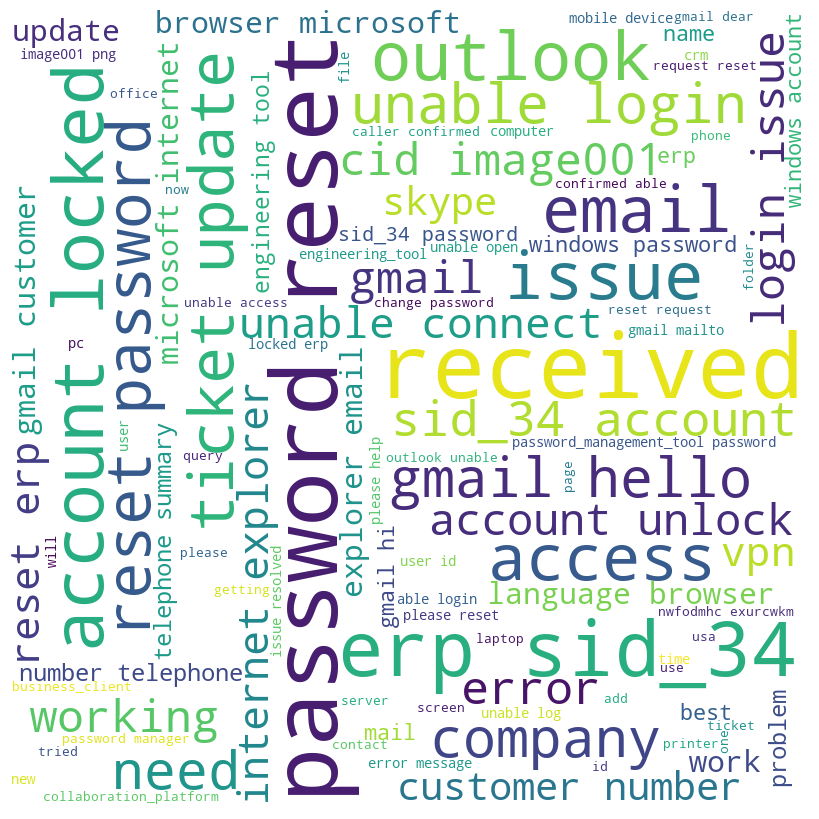

In [94]:
for i in range(0,1):
  group_num = str(i)
  group = 'GRP_' + group_num
  print("Assigment Group : ", group_num)
  wordCloudForGroup(incidents_data,"Ticket_Description",group)

## 3.5.8 N-gram Analysis 

N-gram, Unigram and Bigram analysis
N grams are used to describe number of words as obersvations as unigram means singly-worded, bigram means 2-worded phrase, and trigram means 3-worded phrase.

Will do this analysis before and after the removal of stop-words to look for any unexpected changes

In [95]:
def get_top_n_words(text, n=None,stopwords=None):
    vec = CountVectorizer(ngram_range=(1,1),stop_words=stopwords).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
print("Top 20 Unigrams in the Ticket Description feature before removal of stopwords")
unigram_words = get_top_n_words(incidents_data['Ticket_Description'], 20)
for word, freq in unigram_words:
    print(word, freq)
incidents_df = pd.DataFrame(unigram_words, columns = ['Ticket_Description' , 'count'])

Top 20 Unigrams in the Ticket Description feature before removal of stopwords
to 8744
the 7033
in 5134
com 3774
from 3564
is 3550
on 2959
not 2938
and 2760
company 2744
for 2620
at 2464
no 2377
received 2362
2016 2207
gmail 2202
00 2202
please 2179
erp 2052
password 2040


Now lets visualize the Top 20 unigrams



In [96]:
incidents_df.groupby('Ticket_Description').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 unigrams before removal of stop words')

In [97]:
def get_top_n_bigram(text, n=None,stopwords=None):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words=stopwords).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
print("Top 20 bigrams in the Ticket Description feature before removal of stopwords")
bigram_words = get_top_n_bigram(incidents_data['Ticket_Description'], 20)
for word, freq in bigram_words:
    print(word, freq)
incidents_df1 = pd.DataFrame(bigram_words, columns = ['Ticket_Description' , 'count'])

Top 20 bigrams in the Ticket Description feature before removal of stopwords
received from 2231
gmail com 2202
in job_scheduler 1880
yes no 1744
failed in 1575
job_scheduler at 1573
no na 1570
unable to 1481
company com 1402
from monitoring_tool 939
monitoring_tool company 939
00 received 783
password reset 765
com job 765
to the 717
is not 659
at 09 627
at 10 594
not working 510
at 08 498


Now lets visualize top 20 bigrams

In [98]:
incidents_df1.groupby('Ticket_Description').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams before removal of stop words')

As we can see that there are few english stopwords in the Ticket_Description feature other than the default ones provided by NLTK library, lets extend the default list and then remove them from the Ticket_Description feature and visualize unigrams and bigrams post that.

In [99]:
stopwords = stopwords.union({'yes','na','hi',
                              'hello','no',
                              'regards','thanks',
                              'from','greeting',
                              'reply',
                              'will','please',
                              'see'})

In [100]:
#StopWords removal
incidents_data['Ticket_Description'] = incidents_data['Ticket_Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))


In [101]:
print("Top 20 unigrams in the Ticket Description feature after removal of stopwords")
unigram_words = get_top_n_words(incidents_data['Ticket_Description'], 20,stopwords=stopwords)
for word, freq in unigram_words:
    print(word, freq)
incidents_df = pd.DataFrame(unigram_words, columns = ['Ticket_Description' , 'count'])

Top 20 unigrams in the Ticket Description feature after removal of stopwords
com 3774
company 2744
received 2362
2016 2207
gmail 2202
00 2202
erp 2052
password 2040
job 1944
job_scheduler 1888
failed 1695
10 1582
reset 1504
unable 1496
user 1469
access 1422
issue 1307
account 1205
09 1057
error 1014


In [102]:
incidents_df.groupby('Ticket_Description').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 unigrams after removing stopwords')

In [103]:
bigram_words = get_top_n_bigram(incidents_data['Ticket_Description'], 20,stopwords=stopwords)
for word, freq in bigram_words:
    print(word, freq)
incidents_df1 = pd.DataFrame(bigram_words, columns = ['Ticket_Description' , 'count'])

gmail com 2202
failed job_scheduler 1574
company com 1402
received monitoring_tool 939
monitoring_tool company 939
00 received 783
password reset 771
com job 766
job_scheduler 09 617
job_scheduler 10 570
erp sid_34 497
backup circuit 441
account locked 394
job_scheduler 08 344
00 00 321
cid image001 307
reset password 302
job job_scheduler 300
abended job 298
ticket update 289


In [104]:
incidents_df1.groupby('Ticket_Description').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams after removing stop words')

## *Text preprocessing*

# 3.6 DATA PREPROCESSING 

## *Finding inconsistencies in the data*

### 3.6.1 Fix encoding

In [25]:
def fix_mojibake_text(dataframe,description_column):
  fixed_text = []
  for column in dataframe[[description_column]]:
    # Select column contents by column name using [] operator
    Text = dataframe[column]
    print('Text : ', len(Text))
    for i in range(len(Text)) :
      #print(i)
      fix_text_i = ftfy.fix_text(Text.values[i])
      fixed_text.append(fix_text_i)
    return fixed_text

In [26]:
incidents_data['Fixed_text'] = fix_mojibake_text(incidents_data, 'Ticket_Description')

Text :  8416


In [27]:
incidents_data.head()

,Short description,Description,Caller,Assignment group,Ticket_Description,Fixed_text
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \n\nreceived from: eylqgodm...,cant log in to vpn \n\nreceived from: eylqgodm...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error


Lets verify mojibake text cleaning by taking 1 sample

In [28]:
incidents_data[incidents_data['Assignment group']=='GRP_24'].Ticket_Description

221     support fÃ¼r fa.gstry \arexjftu ohxdwngl suppo...
222     probleme mit bluescreen . hallo ,\n\nes ist er...
253     probleme mit laufwerk z: \laeusvjo fvaihgpx pr...
300     EU_tool ist sehr langsadgtym \ywqgrbnx jwnsyzb...
302     alte eq abholen \wrcktgbd wzrgyunp alte eq abh...
                              ...                        
8329    pobleme mit we_combi \jionmpsf wnkpzcmv poblem...
8330    langsamer rechner \Ã¼berprÃ¼fung \niptbwdq cse...
8332    setup new ws \kebogxzp difnjlkp  setup new ws ...
8333    bluetooth keybankrd defekt \dardabthyr bluetoo...
8335    probleme mit bildschirmschoner \ we91 \jionmps...
Name: Ticket_Description, Length: 285, dtype: object

In [29]:
incidents_data[incidents_data['Assignment group']=='GRP_24'].Fixed_text

221     support für fa.gstry \arexjftu ohxdwngl suppor...
222     probleme mit bluescreen . hallo ,\n\nes ist er...
253     probleme mit laufwerk z: \laeusvjo fvaihgpx pr...
300     EU_tool ist sehr langsadgtym \ywqgrbnx jwnsyzb...
302     alte eq abholen \wrcktgbd wzrgyunp alte eq abh...
                              ...                        
8329    pobleme mit we_combi \jionmpsf wnkpzcmv poblem...
8330    langsamer rechner \überprüfung \niptbwdq csenj...
8332    setup new ws \kebogxzp difnjlkp  setup new ws ...
8333    bluetooth keybankrd defekt \dardabthyr bluetoo...
8335    probleme mit bildschirmschoner \ we91 \jionmps...
Name: Fixed_text, Length: 285, dtype: object

From above we can see that the Mojibake texts are now fixed. Now let's see which all languages are there is dataframe.

For this we will use langdetect library

### 3.6.2 Detecting language 

In [30]:
def language_detector(dataframe):
  try:
    language = detect(dataframe)
    return language
  except:
    return 'Language could not be detected'

In [111]:
incidents_data['Language'] = incidents_data['Fixed_text'].apply(language_detector)

In [112]:
print("Unique langugage counts across")
incidents_data['Language'].value_counts()

Unique langugage counts across


en                                6307
de                                 423
af                                 407
fr                                 341
no                                 145
sv                                 129
da                                 105
it                                 102
ca                                  99
nl                                  92
es                                  38
pl                                  35
zh-cn                               30
ro                                  30
pt                                  28
ko                                  16
cy                                  15
tl                                  12
sq                                  11
et                                  10
id                                   8
sl                                   6
fi                                   5
hr                                   5
lt                                   4
tr                       

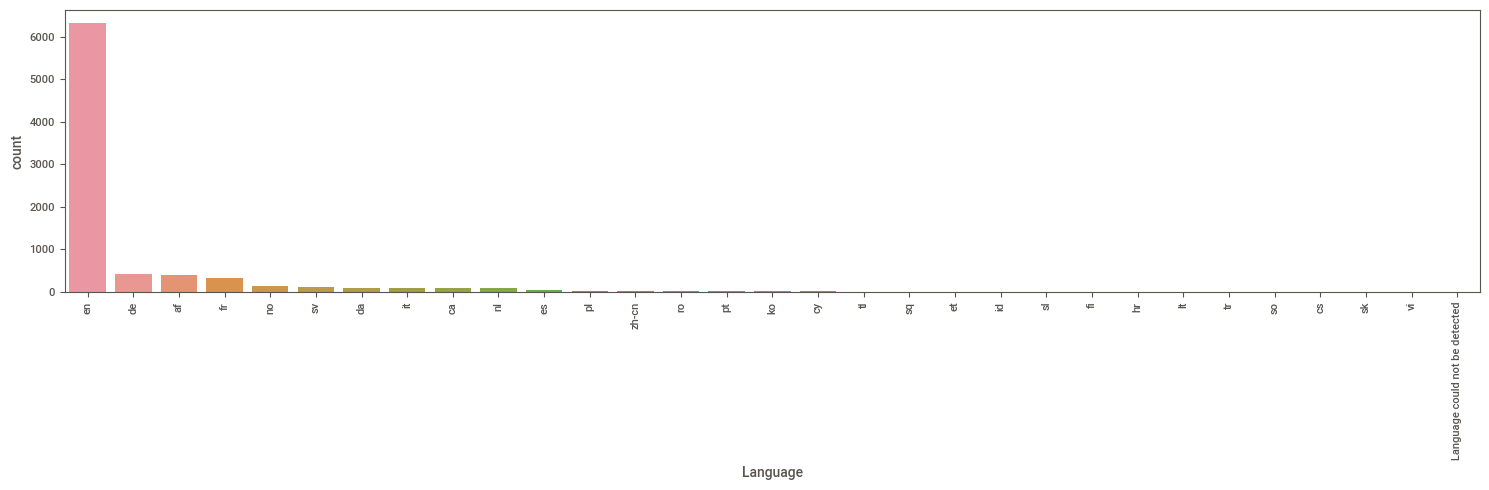

In [117]:
plt.figure(figsize=(15,5))
sortOrder = incidents_data['Language'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(x='Language', data=incidents_data,order=sortOrder)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

Above we see that most of the descriptions are in English langauge followed by German

### 3.6.3 Translation

In [31]:
def translate_to_english(dataframe,description_column, language_column,language):
  english_text = []

  for column in dataframe[[description_column, language_column]]:
    # Select column contents by column name using [] operator
    if column == description_column:
      Text = dataframe[column]
      #print('Text : ', Text[0])

    if column == language_column:
      Lang = dataframe[column]
      #print('Language : ' , Lang[0])
  

  for i in range(len(Text)) :
    print(i)
    try:
      print('Langauge : ' , Lang[i])
      Text_language = Lang[i]
      if Text_language == 'en':
        print('Translation not needed')
        english_text.append(Text[i])
        with open('/content/drive/MyDrive/Colab Notebooks/english text.pkl', 'wb') as f:
          pickle.dump(english_text, f)
          print('File pickled')
      else:            
          print('Original Text: ', Text[i])
          translated = ts.alibaba(Text[i], professional_field='general')
          print('Translation done', translated)
          english_text.append(translated)
          print('Translation appended')
          with open('/content/drive/MyDrive/Colab Notebooks/english text.pkl', 'wb') as f:
            pickle.dump(english_text, f)
            print('File pickled')
    except Exception as e:
      print('Exception occured : ', e)
      for j in range(i,len(Text)):
        english_text.append(Text.values[j])
      with open('/content/drive/MyDrive/Colab Notebooks/english text.pkl', 'wb') as f:
        pickle.dump(english_text, f)
        print('File pickled')
      return english_text
      
  with open('/content/drive/MyDrive/Colab Notebooks/english text.pkl', 'wb') as f:
        pickle.dump(english_text, f)
        print('File pickled')
  return english_text
    
    

Above function was called in chunks of Data and file is pickled for future use and then final set was prepared using the below approach:-

final_translated_texts = []

final_translated_texts.extend(mynewlist1)
final_translated_texts.extend(mynewlist2)
final_translated_texts.extend(mynewlist3)
final_translated_texts.extend(mynewlist4)
final_translated_texts.extend(mynewlist5)
final_translated_texts.extend(mynewlist6)

In [32]:
with open('/content/drive/MyDrive/Colab Notebooks/Final_English_Texts.pkl', 'rb') as f:
  final_translated_texts = pickle.load(f)

In [33]:
print("Index of duplicate data")
duplicate_data.index

Index of duplicate data


Int64Index([  51,  229,  493,  512,  667,  724, 1064, 1125, 1744, 1851, 1982,
            2000, 2061, 2141, 2533, 2554, 2683, 2714, 2720, 2789, 2875, 2876,
            3085, 3219, 3619, 3637, 3647, 3693, 3908, 4094, 4229, 4273, 4303,
            4361, 4495, 4530, 4550, 4704, 4881, 4984, 4991, 5212, 5226, 5317,
            5488, 5521, 5708, 5884, 5928, 5945, 6058, 6130, 6141, 6158, 6252,
            6260, 6265, 6321, 6323, 6340, 6411, 6412, 6471, 6485, 6521, 6522,
            6523, 6524, 6603, 6659, 6739, 6819, 6942, 6992, 7034, 7132, 7459,
            7756, 7772, 7836, 8051, 8093, 8347, 8405],
           dtype='int64')

In [34]:
traslated_text_wo_dupli = []
count = 0
for i in incident_data_with_dupli.index:
  if i not in duplicate_data.index:
    traslated_text_wo_dupli.append(final_translated_texts[i])
  else:
    count = count + 1
print(count)


84


The above code was needed as we did translations before removing duplicates and pickled it so we are removing the translations also for duplicate rows and retaining others to merge later.

In [35]:
print(len(final_translated_texts))
print(len(traslated_text_wo_dupli))

8500
8416


In [36]:
incidents_data['Translated_text'] = traslated_text_wo_dupli

After translations we have about 95% data which is translated correctly. There's still 5% data which are Common Nouns, etc and are left untranslated.

Lets verify the translation by taking 1 sample text


In [37]:
print("Before translation :", incidents_data['Fixed_text'][8415])

Before translation : an mehreren pc`s lassen sich verschiedene prgramdntyme nicht öffnen.  an mehreren pc`s lassen sich verschiedene prgramdntyme nicht öffnen. bereich cnc.


In [38]:
print("After translation :", incidents_data['Translated_text'][8415])

After translation : At several pc's can different prgramdntyme not open. At several pc's can different prgramdntyme not open. Area CNC.


# 3.7 DATA CLEANING
1. Convert the text to lowercase
2. Removing punctuation marks and other special characters
3. Removing numbers as converting them into corresponding words will result into dominance otherwise
4. Removing blank spaces, horizontal tab spaces, new line breaks with single space.
5. Removing stop words, parse terms and other particular words.
6. Removing email addresses as it will not add any significant value into the expected analysis.

In [39]:
EMAIL_PATTERN = r"([\w.+-]+@[a-z\d-]+\.[a-z\d.-]+)"
PUNCT_PATTERN = r"[,|@|\|?|\\|$&*|%|\r|\n|.:|\s+|/|//|\\|/|\||-|<|>|;|(|)|=|+|#|-|\"|[-\]]|{|}]"
def clean_text(df, column_name=''):

   # Convert text to lowercase
  df[column_name] = df[column_name].apply(lambda x: x.lower())

  # Strip unwanted spaces
  df[column_name] = df[column_name].apply(lambda x: x.strip())

  # Select only alphabets
  df[column_name] = df[column_name].apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))
  
  # Remove email ids
  df[column_name] = df[column_name].apply(lambda x: re.sub(EMAIL_PATTERN, '', x, flags=re.IGNORECASE))
  
  df[column_name] = df[column_name].apply(lambda x: re.sub(PUNCT_PATTERN, " ", x, flags=re.MULTILINE))

  #Single-Double line spaces
  df[column_name] = df[column_name].apply(lambda x: re.sub(r'\s+', ' ', x))
  df[column_name] = df[column_name].apply(lambda x: re.sub(r' {2,}', " ", x, flags=re.MULTILINE))
  
  #Special character
  df[column_name] = df[column_name].apply(lambda x: x.replace('`',"'"))

  return df

In [40]:
incidents_data = clean_text(incidents_data,column_name='Translated_text')

In [41]:
print("Translated text post cleaning")
incidents_data['Translated_text']

Translated text post cleaning


0       login issue verified user details employee man...
1       outlook received from hmjdrvpb komuaywn gmail ...
2       cant log in to vpn received from eylqgodm ybqk...
3       unable to access hr tool page unable to access...
4                                 skype error skype error
                              ...                        
8411    emails not coming in from zz mail received fro...
8412    telephony software issue telephony software issue
8413    vip windows password reset for tifpdchb pedxru...
8414    machine n o est funcionando i am unable to acc...
8415    at several pc s can different prgramdntyme not...
Name: Translated_text, Length: 8416, dtype: object

## 3.7.1 Removal of stopwords

In [42]:
incidents_data['cleaned_description'] = incidents_data['Translated_text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stopwords))
incidents_data['cleaned_description'].head()

0    login issue verified user details employee man...
1    outlook received hmjdrvpb komuaywn gmail com h...
2    cant log vpn received eylqgodm ybqkwiam gmail ...
3    unable access hr tool page unable access hr to...
4                              skype error skype error
Name: cleaned_description, dtype: object

Stemming and Lemmatization are Text Normalization (or sometimes called Word Normalization) techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing.

Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.

Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma.




## 3.7.2 Lemmatization


In [43]:
## Lemmatization
incidents_data['cleaned_description']= incidents_data['cleaned_description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
incidents_data['cleaned_description'].head()


0    login issue verified user detail employee mana...
1    outlook received hmjdrvpb komuaywn gmail com h...
2    cant log vpn received eylqgodm ybqkwiam gmail ...
3    unable access hr tool page unable access hr to...
4                              skype error skype error
Name: cleaned_description, dtype: object

In [44]:
incidents_data.head(5)

,Short description,Description,Caller,Assignment group,Ticket_Description,Fixed_text,Translated_text,cleaned_description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...,login issue verified user details employee man...,login issue verified user detail employee mana...
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,outlook received from hmjdrvpb komuaywn gmail ...,outlook received hmjdrvpb komuaywn gmail com h...
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \n\nreceived from: eylqgodm...,cant log in to vpn \n\nreceived from: eylqgodm...,cant log in to vpn received from eylqgodm ybqk...,cant log vpn received eylqgodm ybqkwiam gmail ...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...,unable to access hr tool page unable to access...,unable access hr tool page unable access hr to...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error,skype error skype error,skype error skype error


## *Creating tokens as required*

## 3.7.2 Tokenization

In [45]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
incidents_data['token_desc'] = incidents_data['cleaned_description'].apply(lambda x: tokenizer.tokenize(x))

In [46]:
incidents_data['token_desc'].head()

0    [login, issue, verified, user, detail, employe...
1    [outlook, received, hmjdrvpb, komuaywn, gmail,...
2    [cant, log, vpn, received, eylqgodm, ybqkwiam,...
3    [unable, access, hr, tool, page, unable, acces...
4                         [skype, error, skype, error]
Name: token_desc, dtype: object

# 3.8 PREPARE FINAL TEXT 

After data preprocessing and cleaning, preaparing the final text

In [47]:
# After preprocessing, the text format
def combine_text(tokenized_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    final_text = ' '.join(tokenized_text)
    return final_text

incidents_data['token_description'] = incidents_data['token_desc'].apply(lambda x : combine_text(x))

In [48]:
incidents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Short description    8416 non-null   object
 1   Description          8416 non-null   object
 2   Caller               8416 non-null   object
 3   Assignment group     8416 non-null   object
 4   Ticket_Description   8416 non-null   object
 5   Fixed_text           8416 non-null   object
 6   Translated_text      8416 non-null   object
 7   cleaned_description  8416 non-null   object
 8   token_desc           8416 non-null   object
 9   token_description    8416 non-null   object
dtypes: object(10)
memory usage: 657.6+ KB


In [49]:
incidents_data.to_csv("/content/drive/MyDrive/Colab Notebooks/final_cleaned_data.csv")

In [50]:
incidents_data_final = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_cleaned_data.csv',encoding='utf-8')
incidents_data_final.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,Ticket_Description,Fixed_text,Translated_text,cleaned_description,token_desc,token_description
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...,login issue verified user details employee man...,login issue verified user detail employee mana...,"['login', 'issue', 'verified', 'user', 'detail...",login issue verified user detail employee mana...
1,1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,outlook received from hmjdrvpb komuaywn gmail ...,outlook received hmjdrvpb komuaywn gmail com h...,"['outlook', 'received', 'hmjdrvpb', 'komuaywn'...",outlook received hmjdrvpb komuaywn gmail com h...
2,2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \n\nreceived from: eylqgodm...,cant log in to vpn \n\nreceived from: eylqgodm...,cant log in to vpn received from eylqgodm ybqk...,cant log vpn received eylqgodm ybqkwiam gmail ...,"['cant', 'log', 'vpn', 'received', 'eylqgodm',...",cant log vpn received eylqgodm ybqkwiam gmail ...
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...,unable to access hr tool page unable to access...,unable access hr tool page unable access hr to...,"['unable', 'access', 'hr', 'tool', 'page', 'un...",unable access hr tool page unable access hr to...
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error,skype error skype error,skype error skype error,"['skype', 'error', 'skype', 'error']",skype error skype error


In [51]:
incidents_data_final[incidents_data_final['token_description'].isnull() == True ]

,Unnamed: 0,Short description,Description,Caller,Assignment group,Ticket_Description,Fixed_text,Translated_text,cleaned_description,token_desc,token_description
1850,1850,s,s,gzjtweph mnslwfqv,GRP_0,s s,s s,s s,NaN,[],NaN


In [52]:
#Drop where description is null after cleaning
incidents_data_final_df = incidents_data_final[incidents_data_final['token_description'].isnull() == False ]

In [53]:
incidents_data_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8415 entries, 0 to 8415
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           8415 non-null   int64 
 1   Short description    8407 non-null   object
 2   Description          8414 non-null   object
 3   Caller               8415 non-null   object
 4   Assignment group     8415 non-null   object
 5   Ticket_Description   8415 non-null   object
 6   Fixed_text           8415 non-null   object
 7   Translated_text      8415 non-null   object
 8   cleaned_description  8415 non-null   object
 9   token_desc           8415 non-null   object
 10  token_description    8415 non-null   object
dtypes: int64(1), object(10)
memory usage: 788.9+ KB


# 3.9 NAMED ENTITY RECOGNITION AND POS TAGGING

In [54]:
def display_ner(dataframe,description_column,sentence_number=-1, only_pos_tags=False):
  pos_tags = []
  for column in dataframe[[description_column]]:
    # Select column contents by column name using [] operator
    Text = dataframe[column]
    if sentence_number == -1 and only_pos_tags == True:
      for i in range(len(Text)):
        for y in nlp(str(Text[i])):
          if not y.is_stop and y.pos_ != 'PUNCT':
            y.orth_,y.pos_, y.lemma_
            description_tags = y.orth_+ '' + y.pos_
            pos_tags.append(description_tags)
    else:
      print('Named Entity Recognition for Row' , sentence_number)
      print('---------------------------------------------------------------------')
      print('---------------------------------------------------------------------')
      displacy.render(nlp(str(Text[sentence_number])), jupyter=True, style='ent')
      print()
      print('Dependencies for Row' , sentence_number)
      print('---------------------------------------------------------------------')
      print('---------------------------------------------------------------------')
      displacy.render(nlp(str(Text[sentence_number])), style='dep', jupyter = True, options = {'distance': 120})
      print()
      print('Word in sentence, Parts-of-speech and Lemmatized sentence' , sentence_number)
      print('---------------------------------------------------------------------')
      print('---------------------------------------------------------------------')
      print([(x.orth_,x.pos_, x.lemma_) for x in [y 
                                        for y
                                        in nlp(str(Text[sentence_number])) 
                                        if not y.is_stop and y.pos_ != 'PUNCT']])
      print()
      print([(x, x.ent_iob_, x.ent_type_) for x in nlp(str(Text[sentence_number]))])
      print()
      print(dict([(str(x), x.label_) for x in nlp(str(Text[sentence_number])).ents]))

    return pos_tags


In [55]:
pos_tags = display_ner(incidents_data,'cleaned_description',900)

Named Entity Recognition for Row 900
---------------------------------------------------------------------
---------------------------------------------------------------------



Dependencies for Row 900
---------------------------------------------------------------------
---------------------------------------------------------------------



Word in sentence, Parts-of-speech and Lemmatized sentence 900
---------------------------------------------------------------------
---------------------------------------------------------------------
[('monitor', 'PROPN', 'monitor'), ('length', 'PROPN', 'length'), ('measuring', 'VERB', 'measure'), ('machine', 'NOUN', 'machine'), ('defective', 'ADJ', 'defective'), ('good', 'ADJ', 'good'), ('morning', 'NOUN', 'morning'), ('hkydrfdw', 'NOUN', 'hkydrfdw'), ('monitor', 'NOUN', 'monitor'), ('length', 'NOUN', 'length'), ('measuring', 'VERB', 'measure'), ('machine', 'NOUN', 'machine'), ('defective', 'ADJ', 'defective'), ('short', 'ADJ', 'short'), ('term', 'NOUN', 'term'), ('replacement', 'NOUN', 'replacement'), ('monitor', 'NOUN', 'monitor'), ('thank', 'VERB', 'thank')]

[(monitor, 'O', ''), (length, 'O', ''), (measuring, 'O', ''), (machine, 'O', ''), (defective, 'O', ''), (good, 'O', ''), (morning, 'B', 'TIME'), (hkydrfdw, 'O', ''), (monitor, 'O', ''), (length, 'O', ''), (measuring, 'O', '

In [56]:
tagged_description = incidents_data['cleaned_description'].str.split().map(pos_tag)
tagged_description.head()

0    [(login, JJ), (issue, NN), (verified, VBD), (u...
1    [(outlook, NN), (received, VBD), (hmjdrvpb, JJ...
2    [(cant, JJ), (log, NN), (vpn, NN), (received, ...
3    [(unable, JJ), (access, NN), (hr, NN), (tool, ...
4    [(skype, JJ), (error, NN), (skype, NN), (error...
Name: cleaned_description, dtype: object

In [57]:
#Generic function to count pos tags
def count_tags(description_with_tags):
    tag_count = {}
    for word, tag in description_with_tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    return(tag_count)
tagged_description.map(count_tags).head()

0     {'JJ': 5, 'NN': 13, 'VBD': 4, 'VB': 1, 'VBN': 1}
1    {'NN': 11, 'VBD': 1, 'JJ': 3, 'NNS': 1, 'VBP':...
2               {'JJ': 3, 'NN': 8, 'VBD': 1, 'JJS': 1}
3                                   {'JJ': 2, 'NN': 8}
4                                   {'JJ': 1, 'NN': 3}
Name: cleaned_description, dtype: object

In [58]:
tagged_description = pd.DataFrame(tagged_description)
tagged_description['tag_counts'] = tagged_description['cleaned_description'].map(count_tags)
tagged_description.head()

,cleaned_description,tag_counts
0,"[(login, JJ), (issue, NN), (verified, VBD), (u...","{'JJ': 5, 'NN': 13, 'VBD': 4, 'VB': 1, 'VBN': 1}"
1,"[(outlook, NN), (received, VBD), (hmjdrvpb, JJ...","{'NN': 11, 'VBD': 1, 'JJ': 3, 'NNS': 1, 'VBP':..."
2,"[(cant, JJ), (log, NN), (vpn, NN), (received, ...","{'JJ': 3, 'NN': 8, 'VBD': 1, 'JJS': 1}"
3,"[(unable, JJ), (access, NN), (hr, NN), (tool, ...","{'JJ': 2, 'NN': 8}"
4,"[(skype, JJ), (error, NN), (skype, NN), (error...","{'JJ': 1, 'NN': 3}"


# 4.0. LABEL ENCODING

In [59]:
final_df = incidents_data_final_df

In [60]:
X = final_df['token_description']
y = final_df['Assignment group']

In [61]:
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y)
y = encoder.transform(y)

# 4.1 SPLITTING INTO TRAIN AND TEST DATASET

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=13)

# MODELLING - ROUND 1

*Building a model architecture which can classify.*

## 4.0.4 Function definition to run model

In [63]:
class Timer():
  def __init__(self):
    self.start_ts = None
  def start(self):
    self.start_ts = time()
  def stop(self):
    return '%2fs' % (time()-self.start_ts)

In [64]:
classifier_columns=["Classifier", "Accuracy","F1-Score","Precision","Recall","Time taken"]
clf_table = pd.DataFrame(columns=classifier_columns)

In [65]:
def plot_loss(history,epochs):
  loss_train = history.history['loss']
  loss_val = history.history['val_loss']
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='Validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  return("Training and Validation Loss over 10 epochs")

In [66]:
def plot_accuracy(history,epochs):
  acc_train = history.history['accuracy']
  acc_val = history.history['val_accuracy']
  plt.plot(epochs, acc_train, 'g', label='Training Accuracy')
  plt.plot(epochs, acc_val, 'b', label='Test Accuracy')
  plt.title('Training and Test Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()
  return("Training and Test Accuracy over 10 epochs")

In [67]:
#Defining general function to be executed by each of different classifiers and display performance metrics
timer = Timer()
def run_classifier(estimator,estimator_name,X_train,X_test,y_train,y_test, isNotTraditional,classifier_columns, clf_table, preTasks=True):
  timer.start()
  classifer = estimator
  if preTasks:
    classifer = Pipeline([('tfidf',TfidfVectorizer(min_df=5 ,use_idf=True,analyzer='word', token_pattern=r'\w{1,}', max_features=5000)),
                     ('classifer', estimator)])
  if isNotTraditional :
    history = classifer.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, batch_size=500,verbose=1)
    classifer.save('/content/drive/MyDrive/Colab Notebooks/'+ estimator_name + '.h5')
    y_pred = classifer.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_train_pred = classifer.predict(X_train)
    y_train_pred = np.argmax(y_train_pred, axis=1)
  else:
    classifer.fit(X_train, y_train)
    filename = '/content/drive/MyDrive/Colab Notebooks/' + estimator_name + '.pkl'
    with open(filename, 'wb') as f:
          pickle.dump(classifer, f)
          print('Model pickled')
    y_pred = classifer.predict(X_test)
    y_train_pred = classifer.predict(X_train)
    history=' '
  print("Classifier:" , estimator)
  print("Training Accuracy : " , (accuracy_score(y_train,y_train_pred) * 100))
  print("Test Accuracy : " , (accuracy_score(y_test,y_pred) * 100))
  print("Confusion Matrix : ", (confusion_matrix(y_test,y_pred)))
  print("Classification Report : ",(classification_report(y_test,y_pred)))
  print(timer.stop(), 'time taken to run the model')
  classifier_row = pd.DataFrame([[estimator_name,accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted'),precision_score(y_test,y_pred,average='weighted'),recall_score(y_test,y_pred,average='weighted'),timer.stop()]], columns=classifier_columns)
  clf_table = clf_table.append(classifier_row)
  return clf_table,history

## 4.2.1 Multinomial Naive Bayes

### *Train the model*

In [180]:
multi_nb_clf = MultinomialNB(alpha=0.25)
multi_nb_clf = OneVsRestClassifier(multi_nb_clf)
clf_table, history = run_classifier(multi_nb_clf,'MultinomialNB Classifier - Round 1',X_train,X_test,y_train,y_test,False,classifier_columns,clf_table)

Model pickled
Classifier: OneVsRestClassifier(estimator=MultinomialNB(alpha=0.25, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None)
Training Accuracy :  70.90017825311944
Test Accuracy :  61.200237670825906
Confusion Matrix :  [[748   0   0 ...   0   1   0]
 [  2   0   0 ...   0   2   0]
 [ 11   0   8 ...   0   6   0]
 ...
 [  2   0   0 ...   0   0   0]
 [  4   0   0 ...   0 117   1]
 [ 13   0   0 ...   0  44   1]]
Classification Report :                precision    recall  f1-score   support

           0       0.62      0.98      0.76       762
           1       0.00      0.00      0.00         7
           2       1.00      0.24      0.39        33
           3       0.00      0.00      0.00         7
           4       0.49      0.45      0.47        47
           5       0.62      0.53      0.57        30
           6       0.50      0.22      0.31        27
           7       0.00      0.00      0.00         3
       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [182]:
clf_table

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,MultinomialNB Classifier - Round 1,0.612002,0.70309,0.533347,0.612002,0.676971s


## 4.2.2 SVM Classifier

### *Train the model*

In [183]:
from sklearn import svm
svc_clf = LinearSVC(loss='hinge',random_state=42)
svc_clf = OneVsRestClassifier(svc_clf)
clf_table, history = run_classifier(svc_clf,'SVC Classifier - Round 1',X_train,X_test,y_train,y_test,False,classifier_columns,clf_table)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model pickled
Classifier: OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=42, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)
Training Accuracy :  82.48663101604278
Test Accuracy :  66.66666666666666
Confusion Matrix :  [[720   0   3 ...   0   1   1]
 [  2   1   0 ...   0   0   0]
 [  5   0  10 ...   0   0   7]
 ...
 [  2   0   0 ...   0   0   0]
 [  3   0   0 ...   0  79  34]
 [  6   0   0 ...   0   2  46]]
Classification Report :                precision    recall  f1-score   support

           0       0.72      0.94      0.82       762
           1       1.00      0.14      0.25         7
           2       0.62      0.30      0.41   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [184]:
clf_table

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,MultinomialNB Classifier - Round 1,0.612002,0.703090,0.533347,0.612002,0.676971s
0,SVC Classifier - Round 1,0.666667,0.707262,0.643468,0.666667,1.527838s


## 4.2.3 KNN Classifier

### *Train the model*

In [185]:
knn_model_clf = KNeighborsRegressor(algorithm='auto', leaf_size=30, n_jobs=None, n_neighbors=3, p=2, weights='uniform')
knn_model_clf = OneVsRestClassifier(knn_model_clf)
clf_table, history = run_classifier(knn_model_clf,'KNN Classifier - Round 1',X_train,X_test,y_train,y_test,False,classifier_columns,clf_table)

Model pickled
Classifier: OneVsRestClassifier(estimator=KNeighborsRegressor(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=3,
                                                  p=2, weights='uniform'),
                    n_jobs=None)
Training Accuracy :  77.59952465834819
Test Accuracy :  52.52525252525253
Confusion Matrix :  [[559   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   0]
 [  0   0   6 ...   0   0   6]
 ...
 [  2   0   0 ...   0   0   0]
 [  1   0   0 ...   0  76  36]
 [  1   0   0 ...   0   4  45]]
Classification Report :                precision    recall  f1-score   support

           0       0.85      0.73      0.79       762
           1       0.00      0.00      0.00         7
           2       1.00      0.18      0.3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [186]:
clf_table

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,MultinomialNB Classifier - Round 1,0.612002,0.703090,0.533347,0.612002,0.676971s
0,SVC Classifier - Round 1,0.666667,0.707262,0.643468,0.666667,1.527838s
0,KNN Classifier - Round 1,0.525253,0.495434,0.688724,0.525253,86.517506s


##4.2.4 SGD Classifier

### *Train the model*

In [187]:
sgd_model_clf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
clf_table, history = run_classifier(sgd_model_clf,'SGD Classifier - Round 1',X_train,X_test,y_train,y_test,False,classifier_columns,clf_table)

Model pickled
Classifier: SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
              verbose=0, warm_start=False)
Training Accuracy :  71.33095662507426
Test Accuracy :  62.091503267973856
Confusion Matrix :  [[746   0   1 ...   0   1   0]
 [  2   0   0 ...   0   2   0]
 [ 15   0   8 ...   0   6   0]
 ...
 [  2   0   0 ...   0   0   0]
 [  5   0   0 ...   0 112   0]
 [ 12   0   0 ...   0  40   2]]
Classification Report :                precision    recall  f1-score   support

           0       0.64      0.98      0.77       762
           1       0.00      0.00      0.00         7
           2       0.80      0.24      0.37        33
           3       0.00     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [188]:
clf_table

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,MultinomialNB Classifier - Round 1,0.612002,0.703090,0.533347,0.612002,0.676971s
0,SVC Classifier - Round 1,0.666667,0.707262,0.643468,0.666667,1.527838s
0,KNN Classifier - Round 1,0.525253,0.495434,0.688724,0.525253,86.517506s
0,SGD Classifier - Round 1,0.620915,0.705889,0.565885,0.620915,0.542858s


## 4.2.5 Random Forest

### *Train the model*

In [189]:
from sklearn.ensemble import RandomForestClassifier

random_forest_Clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                                         max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, 
                                         min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
                                         n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)
clf_table, history = run_classifier(random_forest_Clf,'Random Forest Classifier - Round 1',X_train,X_test,y_train,y_test,False,classifier_columns,clf_table)

Model pickled
Classifier: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Training Accuracy :  95.49910873440285
Test Accuracy :  64.70588235294117
Confusion Matrix :  [[749   0   0 ...   0   0   0]
 [  2   0   0 ...   0   0   0]
 [ 14   0   7 ...   0   6   1]
 ...
 [  2   0   0 ...   0   0   0]
 [  3   1   0 ...   0 107   4]
 [ 10   0   0 ...   0  38  10]]
Classification Report :                precision    recall  f1-score   support

           0       0.66      0.98      0.79       762
       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [190]:
clf_table

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,MultinomialNB Classifier - Round 1,0.612002,0.703090,0.533347,0.612002,0.676971s
0,SVC Classifier - Round 1,0.666667,0.707262,0.643468,0.666667,1.527838s
0,KNN Classifier - Round 1,0.525253,0.495434,0.688724,0.525253,86.517506s
0,SGD Classifier - Round 1,0.620915,0.705889,0.565885,0.620915,0.542858s
0,Random Forest Classifier - Round 1,0.647059,0.717783,0.601619,0.647059,8.965739s


## 4.2.6 XGBOOST

### *Train the model*

In [191]:
import xgboost as xgboost

xgb_clf = xgboost.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, subsample=0.8, nthread=10, learning_rate=0.1)
clf_table, history = run_classifier(xgb_clf,'XgBoost Classifier - Round 1',X_train,X_test,y_train,y_test,False,classifier_columns,clf_table)

Model pickled
Classifier: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=10, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)
Training Accuracy :  92.51336898395722
Test Accuracy :  65.47831253713606
Confusion Matrix :  [[722   0   0 ...   0   0   1]
 [  1   0   0 ...   0   0   0]
 [ 12   0   9 ...   0   6   0]
 ...
 [  2   0   0 ...   0   0   0]
 [  6   1   0 ...   0 106   4]
 [  7   0   0 ...   0  38  13]]
Classification Report :                precision    recall  f1-score   support

           0       0.69      0.95      0.80       762
           1       0.00      0.00      0.00         7
           2       0.82      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [192]:
clf_table

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,MultinomialNB Classifier - Round 1,0.612002,0.703090,0.533347,0.612002,0.676971s
0,SVC Classifier - Round 1,0.666667,0.707262,0.643468,0.666667,1.527838s
0,KNN Classifier - Round 1,0.525253,0.495434,0.688724,0.525253,86.517506s
0,SGD Classifier - Round 1,0.620915,0.705889,0.565885,0.620915,0.542858s
0,Random Forest Classifier - Round 1,0.647059,0.717783,0.601619,0.647059,8.965739s
0,XgBoost Classifier - Round 1,0.654783,0.705976,0.622069,0.654783,181.355291s


In [195]:
classifiers_round_1_table = clf_table.copy()

In [196]:
classifiers_round_1_table

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,MultinomialNB Classifier - Round 1,0.612002,0.703090,0.533347,0.612002,0.676971s
0,SVC Classifier - Round 1,0.666667,0.707262,0.643468,0.666667,1.527838s
0,KNN Classifier - Round 1,0.525253,0.495434,0.688724,0.525253,86.517506s
0,SGD Classifier - Round 1,0.620915,0.705889,0.565885,0.620915,0.542858s
0,Random Forest Classifier - Round 1,0.647059,0.717783,0.601619,0.647059,8.965739s
0,XgBoost Classifier - Round 1,0.654783,0.705976,0.622069,0.654783,181.355291s


# 4.2 TREATING CLASS IMBALANCE 

In [68]:
y_train_arr = np.array(y_train).reshape(-1,1)
print(y_train.shape)
print(y_train_arr.shape)

(6732,)
(6732, 1)


In [69]:
X_train_arr = np.array(X_train).reshape(-1,1)
print(X_train.shape)
print(X_train_arr.shape)

(6732,)
(6732, 1)


4.2.1 Transform tokens to vector using  TF-IDF

In [70]:
# word level tf-idf for ticket
tfidf = TfidfVectorizer(analyzer = 'word', min_df=2, max_df=0.95, ngram_range=(1, 2))
incidents_tfidf = tfidf.fit_transform(incidents_data_final_df['token_description'])

In [71]:
print(incidents_tfidf)

  (0, 9020)	0.1316103555978681
  (0, 38)	0.1335785452990491
  (0, 3236)	0.14186324614568951
  (0, 2134)	0.1431636347050675
  (0, 2479)	0.16527487887167563
  (0, 10239)	0.1660955048282438
  (0, 19831)	0.1467449979631819
  (0, 545)	0.15708577063185947
  (0, 12870)	0.18902737495142016
  (0, 15650)	0.10724799046145124
  (0, 397)	0.18902737495142016
  (0, 11448)	0.16782217903035837
  (0, 19833)	0.13724756836435742
  (0, 2538)	0.1660955048282438
  (0, 11460)	0.1687323465828628
  (0, 10661)	0.15331114888934616
  (0, 5302)	0.15651041542222544
  (0, 4332)	0.15708577063185947
  (0, 19809)	0.15594799064396514
  (0, 20073)	0.15708577063185947
  (0, 9051)	0.1687323465828628
  (0, 10259)	0.2719277176243455
  (0, 15691)	0.1290156111607733
  (0, 22)	0.10190290362455635
  (0, 3235)	0.13246605773308226
  :	:
  (8411, 8896)	0.24393098968042326
  (8412, 20202)	0.6292565015098395
  (8412, 20192)	0.41061229784466724
  (8412, 20695)	0.4095694295705652
  (8412, 20673)	0.3014303169365179
  (8412, 12952)	0.2776

In [72]:
#  create a dictionary mapping for the tokens to their tfidf values
tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

Below are the 10 tokens with the lowest tfidf score, which is unsurprisingly, very generic words that we could not use to distinguish one description from another.

In [73]:
print("Tokens with lowest TFIDF score")
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

Tokens with lowest TFIDF score


,tfidf
com,2.122907
received,2.290293
please,2.508483
tool,2.509558
company,2.529651
gmail com,2.682249
gmail,2.682249
company com,2.939514
erp,3.051323
password,3.058745


Below are the 30 tokens with the highest tfidf score, which includes words that are a lot specific that by looking at them, we could guess the categories that they belong to:

In [74]:
print("Tokens with highest TFIDF score")
tfidf.sort_values(by=['tfidf'], ascending=False).head(30)

Tokens with highest TFIDF score


,tfidf
received bmhxwvys,8.939278
happened multiple,8.939278
vnc,8.939278
print printing,8.939278
hanging,8.939278
hanna,8.939278
hanx,8.939278
print pc,8.939278
happened erp,8.939278
happened last,8.939278


### 4.2.2 Convert TF-IDF into dataframe

In [75]:
# collect the tfid matrix in numpy array
incident_tfidf_array = incidents_tfidf.todense()

# store the tf-idf array into pandas dataframe
incident_tfidf_df = pd.DataFrame(incident_tfidf_array)
incident_tfidf_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,21453,21454,21455,21456,21457,21458,21459,21460,21461,21462,21463,21464,21465,21466,21467,21468,21469,21470,21471,21472,21473,21474,21475,21476,21477,21478,21479,21480,21481,21482,21483,21484,21485,21486,21487,21488,21489,21490,21491,21492
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133579,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
incident_tfidf_df_group = incident_tfidf_df.copy()

In [77]:
incident_tfidf_df_group['Assignment group']= incidents_data_final_df['Assignment group']

In [78]:
incident_tfidf_df_group.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,21454,21455,21456,21457,21458,21459,21460,21461,21462,21463,21464,21465,21466,21467,21468,21469,21470,21471,21472,21473,21474,21475,21476,21477,21478,21479,21480,21481,21482,21483,21484,21485,21486,21487,21488,21489,21490,21491,21492,Assignment group
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133579,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0


In [79]:
ros = RandomOverSampler(random_state=777)
X_resmapled, y_resmapled = ros.fit_sample(incidents_tfidf, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [80]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resmapled,y_resmapled,test_size=0.3,random_state=42)

In [81]:
print("Training set : ", X_resampled_train.shape, y_resampled_train.shape)
print("Test set : ", X_resampled_test.shape, y_resampled_test.shape)

Training set :  (203677, 21493) (203677,)
Test set :  (87291, 21493) (87291,)


In [82]:
assignment_group_dist_before = pd.DataFrame(incidents_data_final_df.groupby('Assignment group').size(),columns=['Count']).reset_index()
assignment_group_dist_before.sort_values(by=['Assignment group'])
print("Assignment Group count with imbalanced data")
assignment_group_dist_before.head(10)

Assignment Group count with imbalanced data


,Assignment group,Count
0,GRP_0,3932
1,GRP_1,31
2,GRP_10,140
3,GRP_11,30
4,GRP_12,257
5,GRP_13,145
6,GRP_14,118
7,GRP_15,38
8,GRP_16,85
9,GRP_17,68


In [83]:
assignment_group_dist_before.iplot(kind='pie',
         labels='Assignment group', 
         values='Count',
         title = dict(
                      text = 'Assignment groups distribution before class balancing',
                      x = 0.5,
                      y = 1,
                      xanchor =  'center',
                      yanchor = 'top',
                      #pad = dict(
                       #           t = 0
                        #          ),
                      font = dict(
                                  #family='Courier New, monospace',
                                  size = 20,
                                  #color='#000000'
                                  ))
         )

# Resample


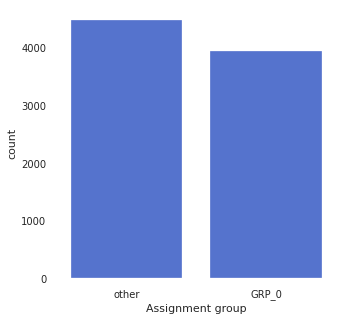

In [84]:
# Create the Dataset for classifying GRP_0
itTicketGRP0DF = incidents_data_final.copy()
itTicketGRP0DF['Assignment group']=itTicketGRP0DF['Assignment group'].apply(lambda x : 'other' if x != 'GRP_0'  else x)

descending_order = itTicketGRP0DF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
sns.countplot(x='Assignment group', data=itTicketGRP0DF, color='royalblue',order=descending_order)

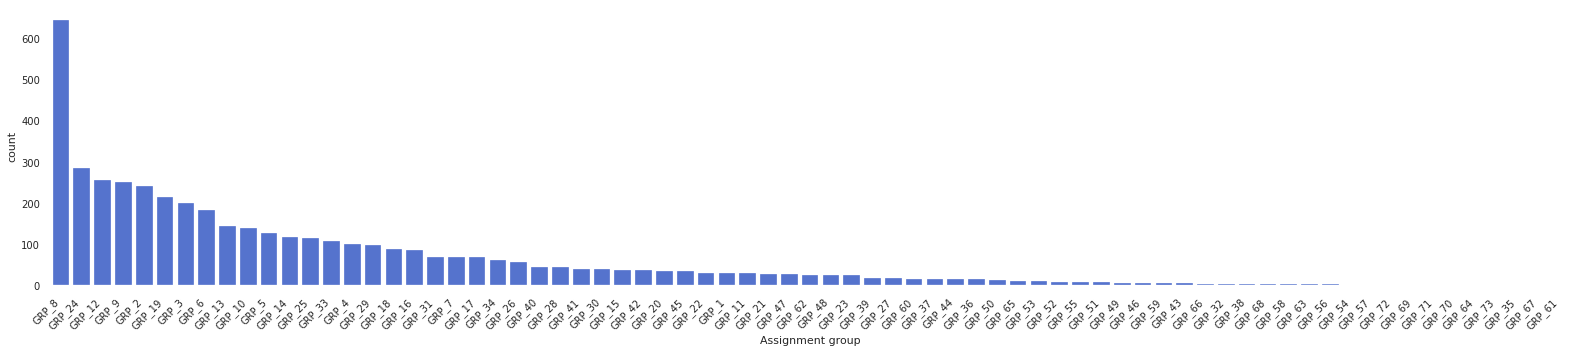

In [85]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
incident_data_except_group0 = incidents_data_final[incidents_data_final['Assignment group'] != 'GRP_0']

incidents_in_descending_order = incident_data_except_group0['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=incident_data_except_group0, color='royalblue',order=incidents_in_descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

Observations

There is high imbalance within the other group

In [86]:
maxOthers = incident_data_except_group0['Assignment group'].value_counts().max()
maxOthers

645

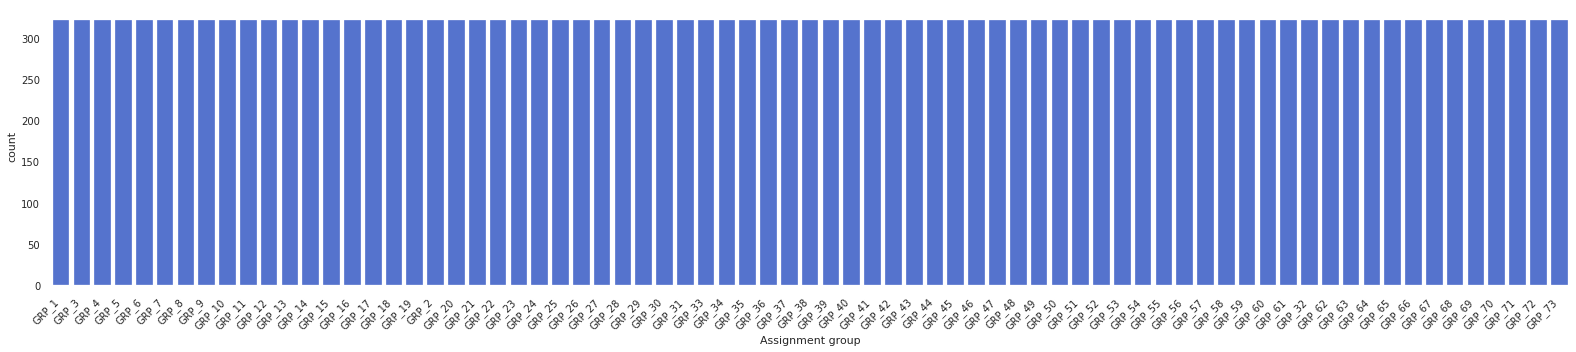

In [87]:
incident_data_except_group0_resampled = incident_data_except_group0[0:0]
for grp in incident_data_except_group0['Assignment group'].unique():
    incident_data_group = incident_data_except_group0[incident_data_except_group0['Assignment group'] == grp]
    resampled = resample(incident_data_group, replace=True, n_samples=int(maxOthers/2), random_state=123)
    incident_data_except_group0_resampled = incident_data_except_group0_resampled.append(resampled)

otherGrpsResampled = pd.concat([itTicketGRP0DF,incident_data_except_group0_resampled])
otherGrpsResampled.reset_index(inplace=True)

descending_order = incident_data_except_group0_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=incident_data_except_group0_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

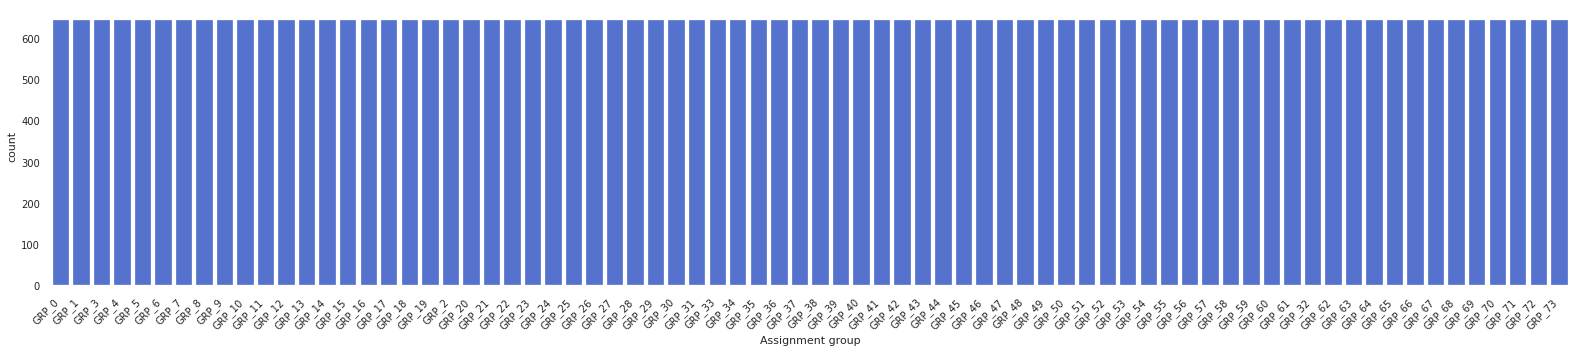

In [88]:
# Treat the imbalnce in the itTicketDF dataset by resampling to 645.
incident_data_all_resampled = incidents_data_final[0:0]
for grp in incidents_data_final['Assignment group'].unique():
    itTicketGrpDF = incidents_data_final[incidents_data_final['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers), random_state=123)
    incident_data_all_resampled = incident_data_all_resampled.append(resampled)

descending_order = incident_data_all_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=incident_data_all_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [89]:
assignment_group_dist_after_1 = pd.DataFrame(incident_data_all_resampled.groupby('Assignment group').size(),columns=['Count']).reset_index()
assignment_group_dist_after_1.sort_values(by=['Assignment group'])
assignment_group_dist_after_1.head(10)

,Assignment group,Count
0,GRP_0,645
1,GRP_1,645
2,GRP_10,645
3,GRP_11,645
4,GRP_12,645
5,GRP_13,645
6,GRP_14,645
7,GRP_15,645
8,GRP_16,645
9,GRP_17,645


In [90]:
assignment_group_dist_after_1.iplot(kind='pie',
         labels='Assignment group', 
         values='Count',
         title = dict(
                      text = 'Distribution after class balancing 1',
                      x = 0.3,
                      y = 1,
                      xanchor = 'right',
                      yanchor = 'top',
                      #pad = dict(
                       #           t = 0
                        #          ),
                      font = dict(
                                  #family='Courier New, monospace',
                                  size = 15,
                                  #color='#000000'
                                  ))
)

In [91]:
final_resampled_df = incident_data_all_resampled

In [92]:
final_resampled_df.to_csv("/content/drive/MyDrive/Colab Notebooks/final_resampled_df.csv")

In [93]:
final_resampled_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_resampled_df.csv')

In [94]:
X = final_resampled_df['token_description']
y = final_resampled_df['Assignment group']

In [95]:
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y)
y = encoder.transform(y)

In [96]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X, y, test_size= 0.2, random_state=13)

# *Building a model architecture which can classify.*

# 4.0 MODELING - ROUND 2

In [246]:
classifier_columns_2=["Classifier", "Accuracy","F1-Score","Precision","Recall","Time taken"]
clf_table_2 = pd.DataFrame(columns=classifier_columns)

## 4.0.4 Function definition to run model

In [ ]:
class Timer():
  def __init__(self):
    self.start_ts = None
  def start(self):
    self.start_ts = time()
  def stop(self):
    return '%2fs' % (time()-self.start_ts)

In [ ]:
classifier_columns=["Classifier", "Accuracy","F1-Score","Precision","Recall","Time taken"]
clf_table = pd.DataFrame(columns=classifier_columns)

In [ ]:
def plot_loss(history,epochs):
  loss_train = history.history['loss']
  loss_val = history.history['val_loss']
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='Validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  return("Training and Validation Loss over 10 epochs")

In [ ]:
def plot_accuracy(history,epochs):
  acc_train = history.history['accuracy']
  acc_val = history.history['val_accuracy']
  plt.plot(epochs, acc_train, 'g', label='Training Accuracy')
  plt.plot(epochs, acc_val, 'b', label='Test Accuracy')
  plt.title('Training and Test Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()
  return("Training and Test Accuracy over 10 epochs")

In [ ]:
#Defining general function to be executed by each of different classifiers and display performance metrics
timer = Timer()
def run_classifier(estimator,estimator_name,X_train,X_test,y_train,y_test, isNotTraditional,classifier_columns, clf_table, preTasks=True):
  timer.start()
  classifer = estimator
  if preTasks:
    classifer = Pipeline([('tfidf',TfidfVectorizer(min_df=5 ,use_idf=True,analyzer='word', token_pattern=r'\w{1,}', max_features=5000)),
                     ('classifer', estimator)])
  if isNotTraditional :
    history = classifer.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, batch_size=500,verbose=1)
    classifer.save('/content/drive/MyDrive/Capstone/'+ estimator_name + '.h5')
    y_pred = classifer.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_train_pred = classifer.predict(X_train)
    y_train_pred = np.argmax(y_train_pred, axis=1)
  else:
    classifer.fit(X_train, y_train)
    filename = '/content/drive/MyDrive/Capstone/' + estimator_name + '.pkl'
    with open(filename, 'wb') as f:
          pickle.dump(classifer, f)
          print('Model pickled')
    y_pred = classifer.predict(X_test)
    y_train_pred = classifer.predict(X_train)
    history=' '
  print("Classifier:" , estimator)
  print("Training Accuracy : " , (accuracy_score(y_train,y_train_pred) * 100))
  print("Test Accuracy : " , (accuracy_score(y_test,y_pred) * 100))
  print("Confusion Matrix : ", (confusion_matrix(y_test,y_pred)))
  print("Classification Report : ",(classification_report(y_test,y_pred)))
  print(timer.stop(), 'time taken to run the model')
  classifier_row = pd.DataFrame([[estimator_name,accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted'),precision_score(y_test,y_pred,average='weighted'),recall_score(y_test,y_pred,average='weighted'),timer.stop()]], columns=classifier_columns)
  clf_table = clf_table.append(classifier_row)
  return clf_table,history

# *Trying different model architectures by researching state of the art for similar tasks.*

## 4.0.5 Multinomial Naive Bayes

# *Train the model*

In [247]:
multi_nb_clf = MultinomialNB(alpha=0.25)
multi_nb_clf = OneVsRestClassifier(multi_nb_clf)
clf_table_2,history = run_classifier(multi_nb_clf,'MultinomialNB Classifier - Round 2',X_resampled_train,X_resampled_test,y_resampled_train,y_resampled_test,False,classifier_columns,clf_table_2)

Model pickled
Classifier: OneVsRestClassifier(estimator=MultinomialNB(alpha=0.25, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None)
Training Accuracy :  91.79237376911796
Test Accuracy :  90.2472239681542
Confusion Matrix :  [[ 41   0   0 ...   0   0   0]
 [  0 117   0 ...   0   0   0]
 [  0   0  93 ...   0   0  13]
 ...
 [  0   0   0 ... 130   0   0]
 [  0   2   1 ...   0  36  52]
 [  0   0   0 ...   0   0 109]]
Classification Report :                precision    recall  f1-score   support

           0       0.76      0.35      0.48       117
           1       0.96      0.84      0.89       140
           2       0.99      0.79      0.88       118
           3       0.96      1.00      0.98       129
           4       0.81      0.59      0.68       130
           5       0.93      0.90      0.91       136
           6       0.95      0.75      0.84       124
           7       0.95      1.00      0.97       126
         

In [248]:
clf_table_2

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,MultinomialNB Classifier - Round 2,0.902472,0.902598,0.921811,0.902472,3.713569s


## 4.0.6 SVM Classifier

# *Train the model*

In [249]:
svc_clf = LinearSVC()
svc_clf = OneVsRestClassifier(svc_clf)
clf_table_2,history = run_classifier(svc_clf,'SVC Classifier - Round 2',X_resampled_train,X_resampled_test,y_resampled_train,y_resampled_test,False,classifier_columns,clf_table_2)

Model pickled
Classifier: OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)
Training Accuracy :  95.95380263984914
Test Accuracy :  94.86695998323906
Confusion Matrix :  [[ 68   0   1 ...   0   0   0]
 [  0 140   0 ...   0   0   0]
 [  0   0 105 ...   0   0   9]
 ...
 [  0   0   0 ... 130   0   0]
 [  0   5   1 ...   0  56  47]
 [  0   0   1 ...   0   0 105]]
Classification Report :                precision    recall  f1-score   support

           0       0.85      0.58      0.69       117
           1       0.90      1.00      0.95       140
           2       0.97      0.89   

In [250]:
clf_table_2

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,MultinomialNB Classifier - Round 2,0.902472,0.902598,0.921811,0.902472,3.713569s
0,SVC Classifier - Round 2,0.948670,0.946304,0.965018,0.948670,7.533591s


##4.0.8 SGD Classifier

# *Train the model*

In [251]:
sgd_model_clf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
clf_table_2,history = run_classifier(sgd_model_clf,'SGD Classifier - Round 2',X_resampled_train,X_resampled_test,y_resampled_train,y_resampled_test,False,classifier_columns,clf_table_2)

Model pickled
Classifier: SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
              verbose=0, warm_start=False)
Training Accuracy :  88.26471820657868
Test Accuracy :  86.926461345066
Confusion Matrix :  [[  9   0   0 ...   0   1   0]
 [  0 132   0 ...   0   0   0]
 [  0   0  83 ...   0   0   0]
 ...
 [  0   0   0 ... 130   0   0]
 [  0   3   1 ...   0  34   0]
 [  0   0   0 ...   0   0  22]]
Classification Report :                precision    recall  f1-score   support

           0       0.75      0.08      0.14       117
           1       0.90      0.94      0.92       140
           2       0.88      0.70      0.78       118
           3       0.94      1.

In [252]:
clf_table_2

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,MultinomialNB Classifier - Round 2,0.902472,0.902598,0.921811,0.902472,3.713569s
0,SVC Classifier - Round 2,0.948670,0.946304,0.965018,0.948670,7.533591s
0,SGD Classifier - Round 2,0.869265,0.879354,0.891305,0.869265,3.873436s


## 4.0.9 Random Forest

# *Train the model*

In [253]:
random_forest_Clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                                         max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, 
                                         min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
                                         n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)
clf_table_2,history = run_classifier(random_forest_Clf,'Random Forest Classifier - Round 2',X_resampled_train,X_resampled_test,y_resampled_train,y_resampled_test,False,classifier_columns,clf_table_2)

Model pickled
Classifier: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Training Accuracy :  96.55876807039597
Test Accuracy :  95.77833647601089
Confusion Matrix :  [[ 90   0   0 ...   0   0   0]
 [  0 140   0 ...   0   0   0]
 [  0   0 105 ...   0   0   9]
 ...
 [  0   0   0 ... 130   0   0]
 [  0   1   1 ...   0  63  47]
 [  2   0   0 ...   0   0 106]]
Classification Report :                precision    recall  f1-score   support

           0       0.87      0.77      0.82       117
       

In [254]:
clf_table_2

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,MultinomialNB Classifier - Round 2,0.902472,0.902598,0.921811,0.902472,3.713569s
0,SVC Classifier - Round 2,0.948670,0.946304,0.965018,0.948670,7.533591s
0,SGD Classifier - Round 2,0.869265,0.879354,0.891305,0.869265,3.873436s
0,Random Forest Classifier - Round 2,0.957783,0.954622,0.975372,0.957783,42.754390s


## 4.0.10 XGBOOST

# *Train the model*

In [255]:
import xgboost as xgboost

xgb_clf = xgboost.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, subsample=0.8, nthread=10, learning_rate=0.1)
clf_table_2,history = run_classifier(xgb_clf,'XgBoost Classifier - Round 2',X_resampled_train,X_resampled_test,y_resampled_train,y_resampled_test,False,classifier_columns,clf_table_2)

Model pickled
Classifier: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=10, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)
Training Accuracy :  96.47758223339619
Test Accuracy :  95.66310496543055
Confusion Matrix :  [[ 85   0   0 ...   0   0   0]
 [  0 140   0 ...   0   0   0]
 [  0   0 105 ...   0   0   9]
 ...
 [  0   0   0 ... 130   0   0]
 [  0   1   1 ...   0  62  47]
 [  1   0   0 ...   0   0 105]]
Classification Report :                precision    recall  f1-score   support

           0       0.88      0.73      0.79       117
           1       0.93      1.00      0.97       140
           2       0.99      

In [256]:
clf_table_2

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,MultinomialNB Classifier - Round 2,0.902472,0.902598,0.921811,0.902472,3.713569s
0,SVC Classifier - Round 2,0.948670,0.946304,0.965018,0.948670,7.533591s
0,SGD Classifier - Round 2,0.869265,0.879354,0.891305,0.869265,3.873436s
0,Random Forest Classifier - Round 2,0.957783,0.954622,0.975372,0.957783,42.754390s
0,XgBoost Classifier - Round 2,0.956631,0.953569,0.974189,0.956631,856.407620s


# 4.0.11 Bagging

In [257]:
bagging_clf = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
clf_table_2,history = run_classifier(bagging_clf,'Bagging Classifier - Round 2',X_resampled_train,X_resampled_test,y_resampled_train,y_resampled_test,False,classifier_columns,clf_table_2)

Model pickled
Classifier: BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                 

In [258]:
clf_table_2

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,MultinomialNB Classifier - Round 2,0.902472,0.902598,0.921811,0.902472,3.713569s
0,SVC Classifier - Round 2,0.948670,0.946304,0.965018,0.948670,7.533591s
0,SGD Classifier - Round 2,0.869265,0.879354,0.891305,0.869265,3.873436s
0,Random Forest Classifier - Round 2,0.957783,0.954622,0.975372,0.957783,42.754390s
0,XgBoost Classifier - Round 2,0.956631,0.953569,0.974189,0.956631,856.407620s
0,Bagging Classifier - Round 2,0.952965,0.950734,0.970131,0.952965,54.931186s


# 4.0.12 Boosting

In [259]:
boosting_clf = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
clf_table_2,history = run_classifier(boosting_clf,'Boosting Classifier - Round 2',X_resampled_train,X_resampled_test,y_resampled_train,y_resampled_test,False,classifier_columns,clf_table_2)

Model pickled
Classifier: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Training Accuracy :  85.3629792583281
Test Accuracy :  83.63712549759062
Confusion Matrix :  [[ 39   0   0 ...   0   0   0]
 [  0 117   0 ...   0   0   0]
 [  0   0  63 ...   0   0   9]
 ...
 [  0   0   0 ... 130   0   0]
 [  0   1   1 ...   0  47  47]
 [  0   0   0 ...   0   0 

In [260]:
clf_table_2

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,MultinomialNB Classifier - Round 2,0.902472,0.902598,0.921811,0.902472,3.713569s
0,SVC Classifier - Round 2,0.948670,0.946304,0.965018,0.948670,7.533591s
0,SGD Classifier - Round 2,0.869265,0.879354,0.891305,0.869265,3.873436s
0,Random Forest Classifier - Round 2,0.957783,0.954622,0.975372,0.957783,42.754390s
0,XgBoost Classifier - Round 2,0.956631,0.953569,0.974189,0.956631,856.407620s
0,Bagging Classifier - Round 2,0.952965,0.950734,0.970131,0.952965,54.931186s
0,Boosting Classifier - Round 2,0.836371,0.826056,0.884197,0.836371,1401.513942s


# 4.0.13 DecisionTree Classifier

In [261]:
decisionTree_clf = tree.DecisionTreeClassifier()
clf_table_2,history = run_classifier(decisionTree_clf,'DecisionTree Classifier - Round 2',X_resampled_train,X_resampled_test,y_resampled_train,y_resampled_test,False,classifier_columns,clf_table_2)

Model pickled
Classifier: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Training Accuracy :  96.55876807039597
Test Accuracy :  95.33836161743139
Confusion Matrix :  [[ 68   1   0 ...   0   0   0]
 [  0 140   0 ...   0   0   0]
 [  0   0 105 ...   0   0   9]
 ...
 [  0   0   0 ... 130   0   0]
 [  0   2   1 ...   0  61  47]
 [  0   0   0 ...   0   0 103]]
Classification Report :                precision    recall  f1-score   support

           0       0.88      0.58      0.70       117
           1       0.92      1.00      0.96       140
           2       0.99      0.89      0.94       118
           3       

In [263]:
clf_table_2

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,MultinomialNB Classifier - Round 2,0.902472,0.902598,0.921811,0.902472,3.713569s
0,SVC Classifier - Round 2,0.948670,0.946304,0.965018,0.948670,7.533591s
0,SGD Classifier - Round 2,0.869265,0.879354,0.891305,0.869265,3.873436s
0,Random Forest Classifier - Round 2,0.957783,0.954622,0.975372,0.957783,42.754390s
0,XgBoost Classifier - Round 2,0.956631,0.953569,0.974189,0.956631,856.407620s
0,Bagging Classifier - Round 2,0.952965,0.950734,0.970131,0.952965,54.931186s
0,Boosting Classifier - Round 2,0.836371,0.826056,0.884197,0.836371,1401.513942s
0,DecisionTree Classifier - Round 2,0.953384,0.950845,0.970456,0.953384,7.126146s


# 4.0.13 Stacking Classifier

In [ ]:
nb = open('/content/drive/MyDrive/Capstone/MultinomialNB Classifier.pkl','rb')
multi_nb_clf = pickle.load(nb)
svc = open('/content/drive/MyDrive/Capstone/SVC Classifier.pkl','rb')
svc_clf = pickle.load(svc)
rf = open('/content/drive/MyDrive/Capstone/Random Forest Classifier.pkl','rb') 
random_forest_Clf = pickle.load(rf)
dt = open('/content/drive/MyDrive/Capstone/DecisionTree Classifier.pkl','rb')
decisionTree_clf = pickle.load(dt)

In [ ]:
stack_clf = StackingCVClassifier(classifiers=[multi_nb_clf,svc_clf,random_forest_Clf,decisionTree_clf],meta_classifier=random_forest_Clf)
print('10-fold cross validation:\n')
for clf, label in zip([multi_nb_clf,svc_clf,random_forest_Clf,decisionTree_clf,stack_clf], 
                      ['MultinomialNB', 
                        'LinearSVC',
                       'Random Forest','DecisionTree',
                       'Stacking Classifier']):
    
    sclf_scores = model_selection.cross_val_score(clf, X_resampled_test.todense(),y_resampled_test,cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (sclf_scores.mean(), sclf_scores.std(), label))

10-fold cross validation:



# *Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.*


In [264]:
classifiers_round_2_table = clf_table_2.copy()

In [265]:
classifiers_round_2_table.set_index(["Classifier"],inplace=True)
classifiers_round_2_table.sort_values(by=['F1-Score'])

,Accuracy,F1-Score,Precision,Recall,Time taken
Classifier,,,,,
Boosting Classifier - Round 2,0.836371,0.826056,0.884197,0.836371,1401.513942s
SGD Classifier - Round 2,0.869265,0.879354,0.891305,0.869265,3.873436s
MultinomialNB Classifier - Round 2,0.902472,0.902598,0.921811,0.902472,3.713569s
SVC Classifier - Round 2,0.948670,0.946304,0.965018,0.948670,7.533591s
Bagging Classifier - Round 2,0.952965,0.950734,0.970131,0.952965,54.931186s
DecisionTree Classifier - Round 2,0.953384,0.950845,0.970456,0.953384,7.126146s
XgBoost Classifier - Round 2,0.956631,0.953569,0.974189,0.956631,856.407620s
Random Forest Classifier - Round 2,0.957783,0.954622,0.975372,0.957783,42.754390s


# Sequential Models

## Convolutional Neural Network(CNN)

Extract Glove 6Billion word embeddings. We will be using the 200d file which has 200 embedding dimensions for each word in the corpus respectively.

In [267]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-07-02 17:24:27--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-07-02 17:24:27--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-07-02 17:24:27--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [268]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [269]:
!ls
!pwd

drive		   glove.6B.300d.txt  Incidents_pandas_profiling_report.html
glove.6B.100d.txt  glove.6B.50d.txt   Incidents_sweetviz_report.html
glove.6B.200d.txt  glove.6B.zip       sample_data
/content


In [270]:
#Checking for max length of the text to be considered
final_resampled_df['text_length']= final_resampled_df['token_description'].apply(lambda x: len(x.split(" ")))

In [271]:
final_resampled_df.head(5)

,Unnamed: 0,Unnamed: 0.1,Short description,Description,Caller,Assignment group,Ticket_Description,Fixed_text,Language,Translated_text,cleaned_description,token_desc,token_description,text_length
0,7625,7625,unlock account email in cell phone the user ...,"hello team,\n\ncould you please unlock account...",qasdhyzm yuglsrwx,GRP_0,unlock account email cell phone user luciano a...,unlock account email cell phone user luciano a...,ca,unlock account email in cell phone the user lu...,unlock account email cell phone user luciano a...,"['unlock', 'account', 'email', 'cell', 'phone'...",unlock account email cell phone user luciano a...,34
1,7313,7313,issues with attachments on outlook,issues with attachments on outlook,seygxbva shqjbzpf,GRP_0,issues attachments outlook issues attachments ...,issues attachments outlook issues attachments ...,en,issues with attachments on outlook issues with...,issue attachment outlook issue attachment outlook,"['issue', 'attachment', 'outlook', 'issue', 'a...",issue attachment outlook issue attachment outlook,6
2,7340,7340,outlook is giving stack guard error.,outlook is giving stack guard error.,navfgybz fuavxjzk,GRP_0,outlook giving stack guard error. outlook givi...,outlook giving stack guard error. outlook givi...,en,outlook is giving stack guard error outlook is...,outlook giving stack guard error outlook givin...,"['outlook', 'giving', 'stack', 'guard', 'error...",outlook giving stack guard error outlook givin...,10
3,2794,2794,engineering_tool error: machining cloud stoppe...,engineering_tool error: machining cloud stoppe...,keinyujo torvxeda,GRP_0,engineering_tool error: machining cloud stoppe...,engineering_tool error: machining cloud stoppe...,en,engineering tool error machining cloud stopped...,engineering tool error machining cloud stopped...,"['engineering', 'tool', 'error', 'machining', ...",engineering tool error machining cloud stopped...,14
4,2326,2326,vip 2-unable to load collaboration_platform site,unable to load collaboration_platform site,ihozauxs ohdqmipz,GRP_0,vip 2-unable load collaboration_platform site ...,vip 2-unable load collaboration_platform site ...,en,vip unable to load collaboration platform site...,vip unable load collaboration platform site un...,"['vip', 'unable', 'load', 'collaboration', 'pl...",vip unable load collaboration platform site un...,11


In [272]:
final_resampled_df['text_length'].describe()

count    47730.000000
mean        33.166876
std         68.973415
min          2.000000
25%         14.000000
50%         19.000000
75%         32.000000
max       1261.000000
Name: text_length, dtype: float64

In [273]:
final_resampled_df['text_length'].quantile(0.9999)

1033.0

In [274]:
#Defining the parameters
embedding_dim=200
max_length = 1000
oov_tok = "<OOV>"

In [275]:
#Function to generate Embeddings
def generate_embeddings(X_train,X_test,fileName):
  tokenizer = Tokenizer(oov_token=oov_tok)
  tokenizer.fit_on_texts(X_train.astype(str))
  X_train = tokenizer.texts_to_sequences(X_train.astype(str))
  X_test = tokenizer.texts_to_sequences(X_test.astype(str))
  #Padding sequences
  X_train = sequence.pad_sequences(X_train, maxlen = max_length, padding='post')
  X_test = sequence.pad_sequences(X_test, maxlen = max_length, padding='post')
  print(X_train.shape)
  print(X_test.shape)
  #Vocabulary size
  #Since there's no word at 0th index, adding 1 to the length of the vocabulary
  word_index = tokenizer.word_index
  num_words_text= len(word_index) + 1
  print("Max no. of words ",num_words_text)

  #Weight matrix using glove embeddings
  embeddings_index = dict()
  glove_file = open(fileName, encoding="utf8")
  for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_index [word] = vector_dimensions

  glove_file.close()
  print("Total word vectors", len(embeddings_index))
  return (X_train,X_test,word_index,embeddings_index)

In [276]:
#Function to generate embedding matrix
embedding_matrix = []
def get_embedding_matrix(word_index, embedding_dim):
  embedding_matrix = np.random.random((len(word_index) + 1, embedding_dim))
  for word, index in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
  print("Embedding Matrix shape", embedding_matrix.shape)
  return embedding_matrix

In [279]:
gloveFileName = 'glove.6B.200d.txt'
#Generating the gloved embedded data
X_resampled_train_g, X_resampled_test_g, word_index_g, embeddings_index = generate_embeddings(X_resampled_train,X_resampled_test,gloveFileName)

(38184, 1000)
(9546, 1000)
Max no. of words  10547
Total word vectors 400000


In [280]:
embeddings_matrix = get_embedding_matrix(word_index_g,embedding_dim)

Embedding Matrix shape (10547, 200)


Lets now build CNN model

In [281]:
def build_CNN(word_index,embeddings_matrix):
  model = Sequential(Embedding(len(word_index) + 1, embedding_dim, input_length=max_length, weights=[embeddings_matrix]))
  model.add(Conv1D(128, 3, padding='same', activation='relu'))
  model.add(MaxPooling1D(3))
  model.add(Conv1D(64, 3, activation='relu'))
  model.add(MaxPooling1D(3))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(74, activation='softmax'))
  optimizer=Adam(learning_rate=0.001)
  model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  print(model.summary())
  return model

In [282]:
cnn_model = build_CNN(word_index_g,embeddings_matrix)
clf_table_2,history = run_classifier(cnn_model,'CNN - Round 2',X_resampled_train_g,X_resampled_test_g,y_resampled_train,y_resampled_test,True,classifier_columns,clf_table_2,preTasks=False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 200)         2109400   
_________________________________________________________________
conv1d (Conv1D)              (None, 1000, 128)         76928     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 333, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 331, 64)           24640     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 110, 64)           0         
_________________________________________________________________
dense (Dense)                (None, 110, 1024)         66560     
_________________________________________________________________
dropout (Dropout)            (None, 110, 1024)         0

In [283]:
clf_table_2

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,MultinomialNB Classifier - Round 2,0.902472,0.902598,0.921811,0.902472,3.713569s
0,SVC Classifier - Round 2,0.948670,0.946304,0.965018,0.948670,7.533591s
0,SGD Classifier - Round 2,0.869265,0.879354,0.891305,0.869265,3.873436s
0,Random Forest Classifier - Round 2,0.957783,0.954622,0.975372,0.957783,42.754390s
0,XgBoost Classifier - Round 2,0.956631,0.953569,0.974189,0.956631,856.407620s
0,Bagging Classifier - Round 2,0.952965,0.950734,0.970131,0.952965,54.931186s
0,Boosting Classifier - Round 2,0.836371,0.826056,0.884197,0.836371,1401.513942s
0,DecisionTree Classifier - Round 2,0.953384,0.950845,0.970456,0.953384,7.126146s
0,CNN - Round 2,0.935156,0.932964,0.953313,0.935156,238.385721s


CNN


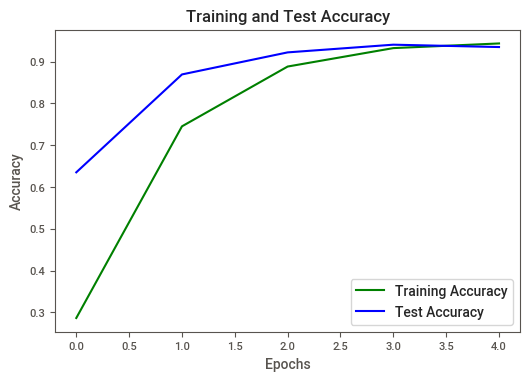

'Training and Test Accuracy over 10 epochs'

In [284]:
print("CNN")
plot_accuracy(history,history.epoch)

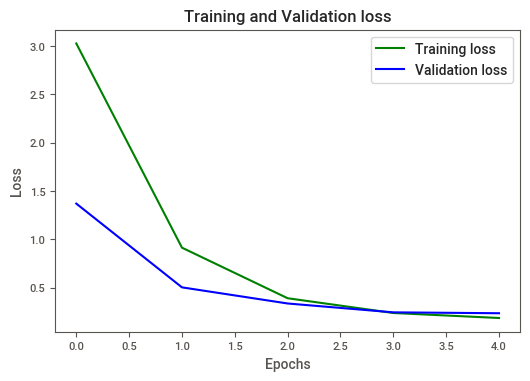

'Training and Validation Loss over 10 epochs'

In [285]:
plot_loss(history,history.epoch)

## LSTM Model

In [286]:
def build_LSTM(word_index,embeddings_matrix):
  model = Sequential(Embedding(len(word_index) + 1, embedding_dim, input_length=max_length, weights=[embeddings_matrix]))
  model.add(Bidirectional(LSTM(128,return_sequences=True)))
  model.add(Bidirectional(LSTM(64, recurrent_dropout=0.1)))
  model.add(Dropout(0.3))
  model.add(Dense(100,activation='relu'))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(74,activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
  print(model.summary())
  return model

In [ ]:
#lstm_model = build_LSTM(word_index_g,embeddings_matrix)
#clf_table_2,history = run_classifier(lstm_model,'LSTM - Round 2',X_resampled_train_g,X_resampled_test_g,y_resampled_train,y_resampled_test,True,classifier_columns,clf_table_2,preTasks=False)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/DISTILBERT_LinerSVC.pkl', 'rb') as f:
  svc_clf = pickle.load(f)

In [ ]:
clf_table_2

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,LSTM,0.920386,0.918289,0.934078,0.920386,3576.689095s


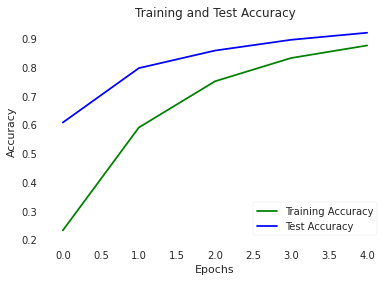

'Training and Test Accuracy over 10 epochs'

In [ ]:
plot_accuracy(history,history.epoch)

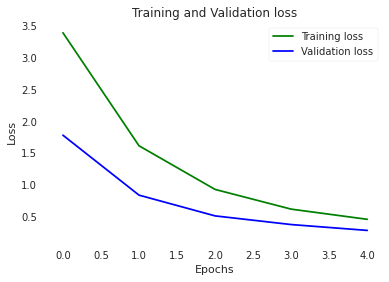

'Training and Validation Loss over 10 epochs'

In [ ]:
plot_loss(history,history.epoch)

## GRU


In [ ]:
def build_GRU(word_index,embeddings_matrix):
  model = Sequential(Embedding(len(word_index) + 1, embedding_dim, input_length=max_length, weights=[embeddings_matrix]))
  model.add(GRU(128,return_sequences=True))
  model.add(Dense(100,activation='relu'))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(74,activation='softmax'))
  optimizer=Adam(learning_rate=0.001)
  model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  print(model.summary())
  return model

In [ ]:
gru_model = build_GRU(word_index_g,embeddings_matrix)
clf_table,history = run_classifier(gru_model,'GRU',X_resampled_train_g,X_resampled_test_g,y_resampled_train,y_resampled_test,True,classifier_columns,clf_table,preTasks=False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 200)         2107000   
_________________________________________________________________
gru (GRU)                    (None, 1000, 128)         126720    
_________________________________________________________________
dense (Dense)                (None, 1000, 100)         12900     
_________________________________________________________________
dropout (Dropout)            (None, 1000, 100)         0         
_________________________________________________________________
flatten (Flatten)            (None, 100000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 74)                7400074   
Total params: 9,646,694
Trainable params: 9,646,694
Non-trainable params: 0
______________________________________________

In [ ]:
clf_table

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,GRU,0.943956,0.940658,0.963943,0.943956,5117.891881s


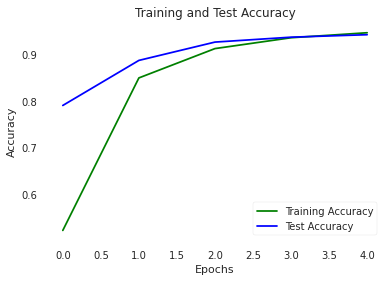

'Training and Test Accuracy over 10 epochs'

In [ ]:
plot_accuracy(history,history.epoch)

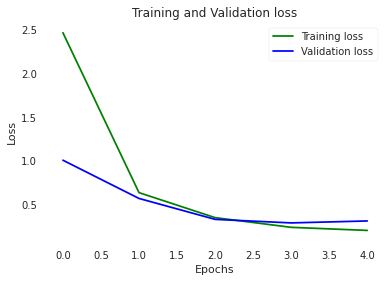

'Training and Validation Loss over 10 epochs'

In [ ]:
plot_loss(history,history.epoch)

## Hyperparameter Tuning

In [ ]:
mnb_clf = MultinomialNB()
parameters = {'alpha': [0.001,0.01], 
              'fit_prior': [True,False]
             }
acc_scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(mnb_clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_resampled_train_g, y_resampled_train)

# Set the clf to the best combination of parameters
mnb_clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
mnb_clf.fit(X_resampled_train_g, y_resampled_train)
y_pred = mnb_clf.predict(X_resampled_test_g)
print(accuracy_score(y_resampled_test,y_pred))


0.31143934632306725


In [ ]:
#Generic function for hyperparameter tuning
def hyperparameter_tune(base_model, parameters, n_iter, kfold, X_train, y_train,isNotTraditional,preTasks=True):
  k = StratifiedKFold(n_splits=kfold, shuffle=False)
  if preTasks:
    classifer = Pipeline([('tfidf',TfidfVectorizer(min_df=5 ,use_idf=True,analyzer='word', token_pattern=r'\w{1,}', max_features=5000)),
                     ('classifer', base_model)])
    #print(classifer.get_params().keys())
  optimal_model = RandomizedSearchCV(classifer,
                            param_distributions=parameters,
                            n_iter=n_iter,
                            cv=k,
                            n_jobs=-1,
                            random_state=42)
  if isNotTraditional :
    print("NA")
  else:
    optimal_model.fit(X_train, y_train)
    scores = cross_val_score(optimal_model, X_train, y_train, cv=k, scoring="accuracy")
    print("Cross Val Mean: {:.3f}, Cross Val Stdev: {:.3f}".format(scores.mean(), scores.std()))
    print("Best Score: {:.3f}".format(optimal_model.best_score_))
    print("Best Parameters: {}".format(optimal_model.best_params_))
    return optimal_model.best_params_, optimal_model.best_score_

In [ ]:
#Multinomial NaiveBayes
timer = Timer()
mnb_clf = MultinomialNB()
parameters = {'classifer__alpha': [0.2,0.25,0.3],'classifer__fit_prior': [True,False]}
scores = []
folds = range(2, 20)
for i in folds:
    print("\ncv = ", i)
    timer.start()
    best_params, best_score = hyperparameter_tune(mnb_clf, parameters, 2, i, X_resampled_train, y_resampled_train,False)
    scores.append(best_score)
print(timer.stop(), 'time taken to run the model with hyperparameter tuning')



cv =  2
Cross Val Mean: 0.895, Cross Val Stdev: 0.005
Best Score: 0.895
Best Parameters: {'classifer__fit_prior': False, 'classifer__alpha': 0.2}

cv =  3
Cross Val Mean: 0.903, Cross Val Stdev: 0.004
Best Score: 0.904
Best Parameters: {'classifer__fit_prior': False, 'classifer__alpha': 0.2}

cv =  4
Cross Val Mean: 0.906, Cross Val Stdev: 0.003
Best Score: 0.906
Best Parameters: {'classifer__fit_prior': False, 'classifer__alpha': 0.2}

cv =  5
Cross Val Mean: 0.907, Cross Val Stdev: 0.004
Best Score: 0.907
Best Parameters: {'classifer__fit_prior': True, 'classifer__alpha': 0.2}

cv =  6
Cross Val Mean: 0.908, Cross Val Stdev: 0.004
Best Score: 0.908
Best Parameters: {'classifer__fit_prior': True, 'classifer__alpha': 0.2}

cv =  7
Cross Val Mean: 0.908, Cross Val Stdev: 0.005
Best Score: 0.908
Best Parameters: {'classifer__fit_prior': True, 'classifer__alpha': 0.2}

cv =  8
Cross Val Mean: 0.909, Cross Val Stdev: 0.006
Best Score: 0.909
Best Parameters: {'classifer__fit_prior': False,

In [ ]:
#RandomForestClassifier
forest_clf = RandomForestClassifier()
parameters = {"classifer__max_depth": [3, 5, 10, None],"classifer__n_estimators": [100, 200, 300, 400, 500],
              "classifer__max_features": randint(1, 3),"classifer__criterion": ["gini", "entropy"],
              "classifer__bootstrap": [True, False],"classifer__min_samples_leaf": randint(1, 4)}
scores = []
folds = range(2, 11)
for i in folds:
    print("\ncv = ", i)
    best_params, best_score = hyperparameter_tune(forest_clf, parameters, 2, i, X_resampled_train, y_resampled_train,False)
    scores.append(best_score)


cv =  2
Cross Val Mean: 0.608, Cross Val Stdev: 0.010
Best Score: 0.620
Best Parameters: {'classifer__bootstrap': True, 'classifer__criterion': 'gini', 'classifer__max_depth': 5, 'classifer__max_features': 1, 'classifer__min_samples_leaf': 3, 'classifer__n_estimators': 300}

cv =  3
Cross Val Mean: 0.621, Cross Val Stdev: 0.026
Best Score: 0.614
Best Parameters: {'classifer__bootstrap': True, 'classifer__criterion': 'gini', 'classifer__max_depth': 5, 'classifer__max_features': 1, 'classifer__min_samples_leaf': 3, 'classifer__n_estimators': 300}

cv =  4
Cross Val Mean: 0.639, Cross Val Stdev: 0.011
Best Score: 0.639
Best Parameters: {'classifer__bootstrap': True, 'classifer__criterion': 'gini', 'classifer__max_depth': 5, 'classifer__max_features': 1, 'classifer__min_samples_leaf': 3, 'classifer__n_estimators': 300}

cv =  5
Cross Val Mean: 0.639, Cross Val Stdev: 0.020
Best Score: 0.641
Best Parameters: {'classifer__bootstrap': True, 'classifer__criterion': 'gini', 'classifer__max_dep

In [ ]:
#DecisionTreeClassifier
timer = Timer()
tree_clf = DecisionTreeClassifier()
parameters = {"classifer__max_depth": [3, None],"classifer__max_features": randint(1, 9),
              "classifer__min_samples_leaf": randint(1, 9),"classifer__criterion": ["gini", "entropy"]}
scores = []
folds = range(2, 30)
for i in folds:
    print("\ncv = ", i)
    timer.start()
    best_params, best_score = hyperparameter_tune(tree_clf, parameters, 2, i, X_resampled_train, y_resampled_train,False)
    scores.append(best_score)
print(timer.stop(), 'time taken to run the model with hyperparameter tuning')


cv =  2
Cross Val Mean: 0.380, Cross Val Stdev: 0.005
Best Score: 0.436
Best Parameters: {'classifer__criterion': 'gini', 'classifer__max_depth': None, 'classifer__max_features': 5, 'classifer__min_samples_leaf': 5}

cv =  3
Cross Val Mean: 0.392, Cross Val Stdev: 0.021
Best Score: 0.418
Best Parameters: {'classifer__criterion': 'gini', 'classifer__max_depth': None, 'classifer__max_features': 5, 'classifer__min_samples_leaf': 5}

cv =  4
Cross Val Mean: 0.436, Cross Val Stdev: 0.042
Best Score: 0.422
Best Parameters: {'classifer__criterion': 'gini', 'classifer__max_depth': None, 'classifer__max_features': 5, 'classifer__min_samples_leaf': 5}

cv =  5
Cross Val Mean: 0.437, Cross Val Stdev: 0.040
Best Score: 0.457
Best Parameters: {'classifer__criterion': 'gini', 'classifer__max_depth': None, 'classifer__max_features': 5, 'classifer__min_samples_leaf': 5}

cv =  6
Cross Val Mean: 0.413, Cross Val Stdev: 0.072
Best Score: 0.436
Best Parameters: {'classifer__criterion': 'gini', 'classife

In [ ]:
#SVM Classifier
timer = Timer()
svm_clf = LinearSVC()
parameters = {'classifer__C': [0.1, 1, 10, 100, 1000], 
              'classifer__loss': ['hinge','squared_hinge'],
              'classifer__penalty': ['l1','l2'], 'classifer__multi_class': ['ovr','crammer_singer'],
              'classifer__fit_intercept': [True,False],'classifer__class_weight': ['balanced']}
scores = []
folds = range(2, 20)
for i in folds:
    print("\ncv = ", i)
    timer.start()
    best_params, best_score = hyperparameter_tune(svm_clf, parameters, 2, i, X_resampled_train, y_resampled_train,False)
    scores.append(best_score)
print(timer.stop(), 'time taken to run the model with hyperparameter tuning')  


cv =  2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Cross Val Mean: 0.925, Cross Val Stdev: 0.000
Best Score: 0.926
Best Parameters: {'classifer__penalty': 'l1', 'classifer__multi_class': 'crammer_singer', 'classifer__loss': 'squared_hinge', 'classifer__fit_intercept': False, 'classifer__class_weight': 'balanced', 'classifer__C': 1}

cv =  3


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Cross Val Mean: 0.931, Cross Val Stdev: 0.001
Best Score: 0.933
Best Parameters: {'classifer__penalty': 'l1', 'classifer__multi_class': 'crammer_singer', 'classifer__loss': 'squared_hinge', 'classifer__fit_intercept': False, 'classifer__class_weight': 'balanced', 'classifer__C': 1}

cv =  4


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Cross Val Mean: 0.937, Cross Val Stdev: 0.006
Best Score: 0.936
Best Parameters: {'classifer__penalty': 'l1', 'classifer__multi_class': 'crammer_singer', 'classifer__loss': 'squared_hinge', 'classifer__fit_intercept': False, 'classifer__class_weight': 'balanced', 'classifer__C': 1}

cv =  5


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Cross Val Mean: 0.938, Cross Val Stdev: 0.003
Best Score: 0.935
Best Parameters: {'classifer__penalty': 'l1', 'classifer__multi_class': 'crammer_singer', 'classifer__loss': 'squared_hinge', 'classifer__fit_intercept': False, 'classifer__class_weight': 'balanced', 'classifer__C': 1}

cv =  6


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Li

Cross Val Mean: 0.939, Cross Val Stdev: 0.004
Best Score: 0.938
Best Parameters: {'classifer__penalty': 'l1', 'classifer__multi_class': 'crammer_singer', 'classifer__loss': 'squared_hinge', 'classifer__fit_intercept': False, 'classifer__class_weight': 'balanced', 'classifer__C': 1}

cv =  7


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Li

Cross Val Mean: 0.940, Cross Val Stdev: 0.003
Best Score: 0.938
Best Parameters: {'classifer__penalty': 'l1', 'classifer__multi_class': 'crammer_singer', 'classifer__loss': 'squared_hinge', 'classifer__fit_intercept': False, 'classifer__class_weight': 'balanced', 'classifer__C': 1}

cv =  8


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Li

Cross Val Mean: 0.941, Cross Val Stdev: 0.004
Best Score: 0.940
Best Parameters: {'classifer__penalty': 'l1', 'classifer__multi_class': 'crammer_singer', 'classifer__loss': 'squared_hinge', 'classifer__fit_intercept': False, 'classifer__class_weight': 'balanced', 'classifer__C': 1}

cv =  9


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Li

Cross Val Mean: 0.939, Cross Val Stdev: 0.004
Best Score: 0.939
Best Parameters: {'classifer__penalty': 'l1', 'classifer__multi_class': 'crammer_singer', 'classifer__loss': 'squared_hinge', 'classifer__fit_intercept': False, 'classifer__class_weight': 'balanced', 'classifer__C': 1}

cv =  10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Li

Cross Val Mean: 0.939, Cross Val Stdev: 0.003
Best Score: 0.938
Best Parameters: {'classifer__penalty': 'l1', 'classifer__multi_class': 'crammer_singer', 'classifer__loss': 'squared_hinge', 'classifer__fit_intercept': False, 'classifer__class_weight': 'balanced', 'classifer__C': 1}

cv =  11


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Li

Cross Val Mean: 0.940, Cross Val Stdev: 0.004
Best Score: 0.940
Best Parameters: {'classifer__penalty': 'l1', 'classifer__multi_class': 'crammer_singer', 'classifer__loss': 'squared_hinge', 'classifer__fit_intercept': False, 'classifer__class_weight': 'balanced', 'classifer__C': 1}

cv =  12


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Li

Cross Val Mean: 0.939, Cross Val Stdev: 0.004
Best Score: 0.941
Best Parameters: {'classifer__penalty': 'l1', 'classifer__multi_class': 'crammer_singer', 'classifer__loss': 'squared_hinge', 'classifer__fit_intercept': False, 'classifer__class_weight': 'balanced', 'classifer__C': 1}

cv =  13


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Li

In [ ]:
#SGD Classifier
timer = Timer()
sgd = SGDClassifier()
parameters = {"classifer__loss": ['hinge', 'log', 'modified_huber', 'squared_hinge','perceptron'],
              "classifer__penalty": ['l1', 'l2', 'elasticnet'],"classifer__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              "classifer__learning_rate": ['constant', 'optimal', 'invscaling', 'adaptive'],
              "classifer__class_weight": [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}], "classifer__eta0" : [1, 10, 100] }
scores = []
folds = range(2, 20)
for i in folds:
    print("\ncv = ", i)
    timer.start()
    best_params, best_score = hyperparameter_tune(sgd, parameters, 2, i, X_resampled_train, y_resampled_train,False)
    scores.append(best_score)
print(timer.stop(), 'time taken to run the model with hyperparameter tuning')


cv =  2
Cross Val Mean: 0.648, Cross Val Stdev: 0.001
Best Score: 0.649
Best Parameters: {'classifer__penalty': 'elasticnet', 'classifer__loss': 'log', 'classifer__learning_rate': 'optimal', 'classifer__eta0': 100, 'classifer__class_weight': {1: 0.5, 0: 0.5}, 'classifer__alpha': 0.001}

cv =  3
Cross Val Mean: 0.644, Cross Val Stdev: 0.007
Best Score: 0.646
Best Parameters: {'classifer__penalty': 'elasticnet', 'classifer__loss': 'log', 'classifer__learning_rate': 'optimal', 'classifer__eta0': 100, 'classifer__class_weight': {1: 0.5, 0: 0.5}, 'classifer__alpha': 0.001}

cv =  4
Cross Val Mean: 0.647, Cross Val Stdev: 0.005
Best Score: 0.647
Best Parameters: {'classifer__penalty': 'elasticnet', 'classifer__loss': 'log', 'classifer__learning_rate': 'optimal', 'classifer__eta0': 100, 'classifer__class_weight': {1: 0.5, 0: 0.5}, 'classifer__alpha': 0.001}

cv =  5
Cross Val Mean: 0.647, Cross Val Stdev: 0.005
Best Score: 0.647
Best Parameters: {'classifer__penalty': 'elasticnet', 'classife

KeyboardInterrupt: ignored

In [ ]:
#Boosting Classifier
timer = Timer()
boost_clf = GradientBoostingClassifier()
parameters = {"classifer__loss": ['deviance'], "classifer__learning_rate": [0.01, 0.1, 0.15, 0.2],
              "classifer__max_depth":[3,5,8], "classifer__max_features":['log2','sqrt','auto'],
              "classifer__criterion": ['friedman_mse','mse'],"classifer__n_estimators":[50,100]}
scores = []
folds = range(2, 20)
for i in folds:
    print("\ncv = ", i)
    timer.start()
    best_params, best_score = hyperparameter_tune(boost_clf, parameters, 2, i, X_resampled_train, y_resampled_train,False)
    scores.append(best_score)
print(timer.stop(), 'time taken to run the model with hyperparameter tuning')


cv =  2
Cross Val Mean: 0.877, Cross Val Stdev: 0.009
Best Score: 0.874
Best Parameters: {'classifer__n_estimators': 100, 'classifer__max_features': 'log2', 'classifer__max_depth': 3, 'classifer__loss': 'deviance', 'classifer__learning_rate': 0.1, 'classifer__criterion': 'friedman_mse'}

cv =  3


KeyboardInterrupt: ignored

## Round - 2 Sequential Models

In [ ]:
def build_CNN2(word_index,embeddings_matrix):
  model = Sequential(Embedding(len(word_index) + 1, embedding_dim, input_length=max_length, weights=[embeddings_matrix]))
  model.add(Conv1D(128, 3, padding='same', activation='tanh'))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(3))
  model.add(Conv1D(64, 3, activation='tanh'))
  model.add(MaxPooling1D(3))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(74, activation='softmax'))
  optimizer=Adam(learning_rate=0.01)
  model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  print(model.summary())
  return model

In [ ]:
cnn_model2 = build_CNN2(word_index_g,embeddings_matrix)
clf_table,history = run_classifier(cnn_model2,'CNN2',X_resampled_train_g,X_resampled_test_g,y_resampled_train,y_resampled_test,True,classifier_columns,clf_table,preTasks=False)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 1000, 200)         2107000   
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 1000, 128)         76928     
_________________________________________________________________
batch_normalization_5 (Batch (None, 1000, 128)         512       
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 333, 128)          0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 331, 64)           24640     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 110, 64)           0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 110, 64)          

In [ ]:
clf_table

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,LSTM,0.920386,0.918289,0.934078,0.920386,3576.689095s
0,CNN,0.944270,0.941576,0.963528,0.944270,190.300719s
0,CNN2,0.339514,0.352679,0.610011,0.339514,166.363117s
0,CNN2,0.676828,0.682457,0.840091,0.676828,149.895712s
0,CNN2,0.584224,0.574763,0.886787,0.584224,150.283612s
0,CNN2,0.706474,0.693231,0.915346,0.706474,148.529204s


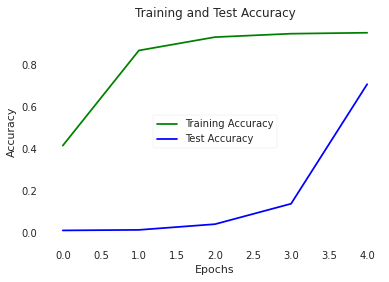

'Training and Test Accuracy over 10 epochs'

In [ ]:
plot_accuracy(history,history.epoch)

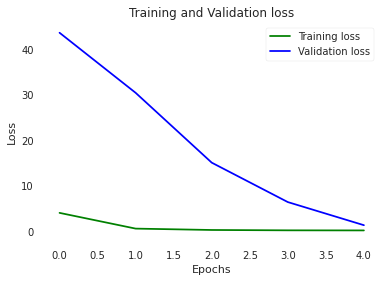

'Training and Validation Loss over 10 epochs'

In [ ]:
plot_loss(history,history.epoch)

In [ ]:
def build_LSTM2(word_index,embeddings_matrix):
  model = Sequential(Embedding(len(word_index) + 1, embedding_dim, input_length=max_length, weights=[embeddings_matrix]))
  model.add(Bidirectional(LSTM(128,return_sequences=True)))
  model.add(BatchNormalization())
  model.add(Bidirectional(LSTM(64, recurrent_dropout=0.1)))
  model.add(Dropout(0.3))
  model.add(Dense(100,activation='tanh'))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(74,activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
  print(model.summary())
  return model

In [ ]:
lstm_model2 = build_LSTM2(word_index_g,embeddings_matrix)
clf_table,history = run_classifier(lstm_model2,'LSTM2',X_resampled_train_g,X_resampled_test_g,y_resampled_train,y_resampled_test,True,classifier_columns,clf_table,preTasks=False)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 1000, 200)         2107000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 1000, 256)         336896    
_________________________________________________________________
batch_normalization_8 (Batch (None, 1000, 256)         1024      
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               164352    
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               12900     
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)             

In [ ]:
clf_table

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,LSTM,0.920386,0.918289,0.934078,0.920386,3576.689095s
0,CNN,0.944270,0.941576,0.963528,0.944270,190.300719s
0,CNN2,0.339514,0.352679,0.610011,0.339514,166.363117s
0,CNN2,0.676828,0.682457,0.840091,0.676828,149.895712s
0,CNN2,0.584224,0.574763,0.886787,0.584224,150.283612s
0,CNN2,0.706474,0.693231,0.915346,0.706474,148.529204s
0,LSTM2,0.444689,0.440100,0.755324,0.444689,417.792489s
0,LSTM2,0.359941,0.379396,0.578241,0.359941,422.684039s
0,LSTM2,0.882464,0.881545,0.905843,0.882464,3559.554775s


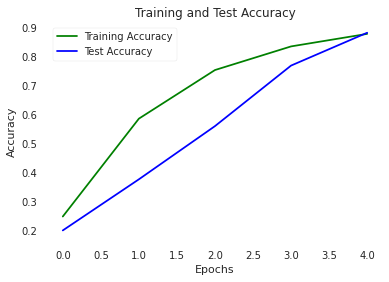

'Training and Test Accuracy over 10 epochs'

In [ ]:
plot_accuracy(history,history.epoch)

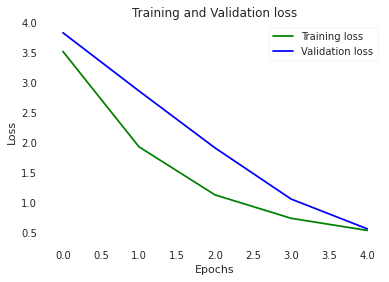

'Training and Validation Loss over 10 epochs'

In [ ]:
plot_loss(history,history.epoch)

In [ ]:
def build_GRU2(word_index,embeddings_matrix):
  model = Sequential(Embedding(len(word_index) + 1, embedding_dim, input_length=max_length, weights=[embeddings_matrix]))
  model.add(GRU(128,return_sequences=True))
  model.add(BatchNormalization())
  model.add(Dense(100,activation='tanh'))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(74,activation='softmax'))
  optimizer=Adam(learning_rate=0.0001)
  model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  print(model.summary())
  return model

In [ ]:
gru_model2 = build_GRU2(word_index_g,embeddings_matrix)
clf_table,history = run_classifier(gru_model2,'GRU2',X_resampled_train_g,X_resampled_test_g,y_resampled_train,y_resampled_test,True,classifier_columns,clf_table,preTasks=False)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 200)         2107000   
_________________________________________________________________
gru_1 (GRU)                  (None, 1000, 128)         126720    
_________________________________________________________________
batch_normalization_1 (Batch (None, 1000, 128)         512       
_________________________________________________________________
dense_2 (Dense)              (None, 1000, 100)         12900     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100000)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 74)               

In [ ]:
clf_table

,Classifier,Accuracy,F1-Score,Precision,Recall,Time taken
0,GRU2,0.843914,0.850955,0.882953,0.843914,222.286689s


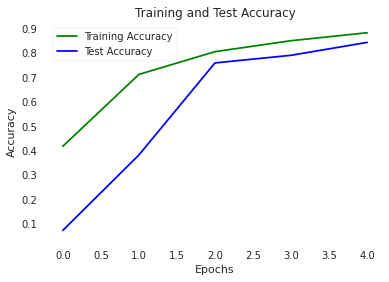

'Training and Test Accuracy over 10 epochs'

In [ ]:
plot_accuracy(history,history.epoch)

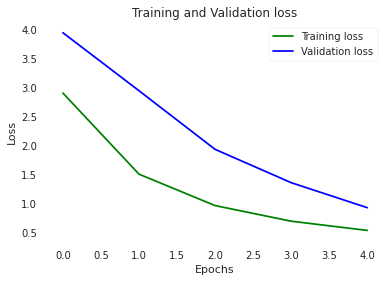

'Training and Validation Loss over 10 epochs'

In [ ]:
plot_loss(history,history.epoch)

# Transfer learning - BERT

In [90]:
!pip install transformers

In [91]:
import transformers as ppb
import torch

In [92]:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

In [93]:
# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [94]:
print(X.shape)
print(y.shape)

(47730,)
(47730,)


In [95]:
len(X) 

47730

In [96]:
def prepare_features_and_labels(X, y, batch_size):
  data_length = len(X)
  iteration = 0
  for i in range(0, data_length, batch_size):
    iteration = iteration + 1

    print("Iteration : ", iteration)
    X_batch = X[i:i+batch_size]
    y_batch = y[i:i+batch_size]

    print("Size of X in batch", X_batch.shape)
    print("Size of y in batch", y_batch.shape)

    tokenized = X_batch.apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=50, truncation=True)))

    max_len = 0
    for i in tokenized.values:
        if len(i) > max_len:
            max_len = len(i)

    padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
    print("Size of padded in batch", np.array(padded).shape)
    
    attention_mask = np.where(padded != 0, 1, 0)
    print("Size of attention mask in batch", attention_mask.shape)

    input_ids = torch.tensor(padded)  
    attention_mask = torch.tensor(attention_mask)
    print("Converted to tensor")

    with torch.no_grad():
        last_hidden_states = model(input_ids, attention_mask=attention_mask)

    print("Hidden state prepared")

    features = last_hidden_states[0][:,0,:].numpy()
    labels = y_batch

    print("Preparing final features and labels")
    if iteration > 1:
      features_final = np.vstack((features_final, features))
      labels_final = np.append(labels_final,labels)
    else:
      features_final = features
      labels_final = labels

    
  print("Shape of final features in batch", features_final.shape)
  print("Shape of final labels in batch", labels_final.shape)

  return features_final, labels_final

In [ ]:
#Ran and pickled the features to save time later. In case you want to use for your dataset, uncomment the line and prepare features and labels again uainf DISTILBERT weights
features_final , labels_final = prepare_features_and_labels(X, y, 1000)

Iteration :  1
Size of X in batch (1000,)
Size of y in batch (1000,)
Size of padded in batch (1000, 50)
Size of attention mask in batch (1000, 50)
Converted to tensor
Hidden state prepared
Preparing final features and labels
Iteration :  2
Size of X in batch (1000,)
Size of y in batch (1000,)
Size of padded in batch (1000, 50)
Size of attention mask in batch (1000, 50)
Converted to tensor
Hidden state prepared
Preparing final features and labels
Iteration :  3
Size of X in batch (1000,)
Size of y in batch (1000,)
Size of padded in batch (1000, 50)
Size of attention mask in batch (1000, 50)
Converted to tensor
Hidden state prepared
Preparing final features and labels
Iteration :  4
Size of X in batch (1000,)
Size of y in batch (1000,)
Size of padded in batch (1000, 50)
Size of attention mask in batch (1000, 50)
Converted to tensor
Hidden state prepared
Preparing final features and labels
Iteration :  5
Size of X in batch (1000,)
Size of y in batch (1000,)
Size of padded in batch (1000, 

In [2]:
#filename = '/content/drive/MyDrive/Colab Notebooks/DISTILBERT_features.pkl'
#with open(filename, 'wb') as f:
#      pickle.dump(features_final, f)
#      print('Features pickled')

In [3]:
#filename = '/content/drive/MyDrive/Colab Notebooks/DISTILBERT_labels.pkl'
#with open(filename, 'wb') as f:
#      pickle.dump(labels_final, f)
#      print('Labels pickled')

In [4]:
#with open('/content/drive/MyDrive/Colab Notebooks/DISTILBERT_features.pkl', 'rb') as f:
#  final_features = pickle.load(f)

In [5]:
#with open('/content/drive/MyDrive/Colab Notebooks/DISTILBERT_labels.pkl', 'rb') as f:
#  final_labels = pickle.load(f)

In [ ]:
#train_features, test_features, train_labels, test_labels = train_test_split(final_features, final_labels)

In [ ]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import cross_val_score

In [ ]:
#svc_clf = LinearSVC(loss='hinge',random_state=42,max_iter=10000)
#svc_clf.fit(train_features,train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=10000, multi_class='ovr',
          penalty='l2', random_state=42, tol=0.0001, verbose=0)

In [6]:
with open('/content/drive/MyDrive/Colab Notebooks/DISTILBERT_LinerSVC.pkl', 'rb') as f:
  svc_clf = pickle.load(f)

FileNotFoundError: ignored

In [ ]:
svc_clf.score(test_features, test_labels)

0.9301097796027822

In [1]:
filename = '/content/drive/MyDrive/Colab Notebooks/DISTILBERT_LinerSVC.pkl'
with open(filename, 'wb') as f:
      pickle.dump(svc_clf, f) 
      print('DISTILBERT_LinerSVC pickled')

FileNotFoundError: ignored

In [ ]:
lr_clf = LogisticRegression(max_iter=10000)
lr_clf.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
with open('/content/drive/MyDrive/Colab Notebooks/DISTILBERT_LinearRegression.pkl', 'rb') as f:
  lr_clf = pickle.load(f)

NameError: ignored

In [ ]:
lr_clf.score(test_features, test_labels)

0.9316182016257437

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/DISTILBERT_LinearRegression.pkl'
with open(filename, 'wb') as f:
      pickle.dump(lr_clf, f)
      print('DISTILBERT_LinearRegression pickled')

DISTILBERT_LinearRegression pickled


# Cohen Kappa Benchmark comparision

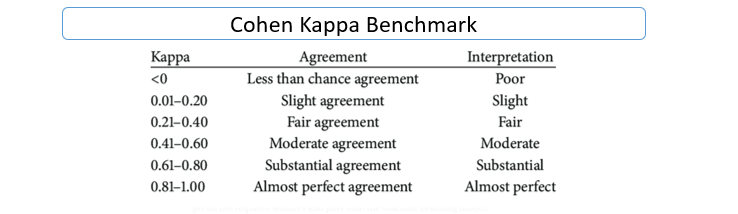

In [160]:
kappa_classifier_columns=["Classifier", "Accuracy","F1-Score","Precision","Recall", "Cohen Kappa Score"]
kappa_clf_table = pd.DataFrame(columns=kappa_classifier_columns)

In [161]:
from sklearn.metrics import cohen_kappa_score
import h5py

In [162]:
def get_model_accuracy(classifier_name,classifier, kappa_classifier_columns, kappa_clf_table):
  y_pred = classifier.predict(X_resampled_test)
  kappa = cohen_kappa_score(y_resampled_test, y_pred)
  classifier_row = pd.DataFrame([[classifier_name,accuracy_score(y_pred, y_resampled_test),f1_score(y_pred, y_resampled_test,average='weighted'),precision_score(y_resampled_test,y_pred,average='weighted'),recall_score(y_resampled_test,y_pred,average='weighted'),cohen_kappa_score(y_resampled_test, y_pred)]], columns=kappa_classifier_columns)
  kappa_clf_table = kappa_clf_table.append(classifier_row)
  return kappa_clf_table

In [163]:
def print_model_accuracy(classifier_name, kappa_classifier_columns, kappa_clf_table,file_type):
  filename = '/content/drive/MyDrive/Colab Notebooks/' + classifier_name
  print(filename)
  if file_type == 'pickle':
    with open(filename, 'rb') as f:
      classifier = pickle.load(f)

      kappa_clf_table = get_model_accuracy(classifier_name,classifier, kappa_classifier_columns, kappa_clf_table)
  elif file_type == 'h5':
    classifier = keras.models.load_model(filename)

    kappa_clf_table = get_model_accuracy(classifier_name,classifier, kappa_classifier_columns, kappa_clf_table)
  return kappa_clf_table


In [164]:
kappa_clf_table = print_model_accuracy('Boosting Classifier - Round 2.pkl', kappa_classifier_columns, kappa_clf_table,'pickle')
kappa_clf_table = print_model_accuracy('Bagging Classifier - Round 2.pkl', kappa_classifier_columns, kappa_clf_table, 'pickle')
kappa_clf_table = print_model_accuracy('DecisionTree Classifier - Round 2.pkl', kappa_classifier_columns, kappa_clf_table, 'pickle')
kappa_clf_table = print_model_accuracy('MultinomialNB Classifier - Round 2.pkl', kappa_classifier_columns, kappa_clf_table, 'pickle')
kappa_clf_table = print_model_accuracy('Random Forest Classifier - Round 2.pkl', kappa_classifier_columns, kappa_clf_table, 'pickle')
kappa_clf_table = print_model_accuracy('SGD Classifier - Round 2.pkl', kappa_classifier_columns, kappa_clf_table, 'pickle')
kappa_clf_table = print_model_accuracy('SVC Classifier - Round 2.pkl', kappa_classifier_columns, kappa_clf_table, 'pickle')
kappa_clf_table = print_model_accuracy('XgBoost Classifier - Round 2.pkl', kappa_classifier_columns, kappa_clf_table, 'pickle')

/content/drive/MyDrive/Colab Notebooks/Boosting Classifier - Round 2.pkl
/content/drive/MyDrive/Colab Notebooks/Bagging Classifier - Round 2.pkl
/content/drive/MyDrive/Colab Notebooks/DecisionTree Classifier - Round 2.pkl
/content/drive/MyDrive/Colab Notebooks/MultinomialNB Classifier - Round 2.pkl
/content/drive/MyDrive/Colab Notebooks/Random Forest Classifier - Round 2.pkl
/content/drive/MyDrive/Colab Notebooks/SGD Classifier - Round 2.pkl
/content/drive/MyDrive/Colab Notebooks/SVC Classifier - Round 2.pkl
/content/drive/MyDrive/Colab Notebooks/XgBoost Classifier - Round 2.pkl


In [165]:
kappa_clf_table

,Classifier,Accuracy,F1-Score,Precision,Recall,Cohen Kappa Score
0,Boosting Classifier - Round 2.pkl,0.836371,0.826056,0.884197,0.836371,0.834129
0,Bagging Classifier - Round 2.pkl,0.952965,0.950734,0.970131,0.952965,0.952317
0,DecisionTree Classifier - Round 2.pkl,0.953384,0.950845,0.970456,0.953384,0.952742
0,MultinomialNB Classifier - Round 2.pkl,0.902472,0.902598,0.921811,0.902472,0.901129
0,Random Forest Classifier - Round 2.pkl,0.957783,0.954622,0.975372,0.957783,0.957202
0,SGD Classifier - Round 2.pkl,0.869265,0.879354,0.891305,0.869265,0.867459
0,SVC Classifier - Round 2.pkl,0.948670,0.946304,0.965018,0.948670,0.947963
0,XgBoost Classifier - Round 2.pkl,0.956631,0.953569,0.974189,0.956631,0.956034
